# Music generation with Auto-Encoder

Build a 2 layers auto-encoder with TensorFlow to generate music with a lower latent space and construct them.

- Author: Antoine Drabble
- Project: https://github.com/drabble/???

Sources : 

- https://keras.io/examples/generative/vae/
- https://wiseodd.github.io/techblog/2016/12/10/variational-autoencoder/

## Imports

In [1]:
import midi #pip install git+https://github.com/vishnubob/python-midi@feature/python3
import numpy as np

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import keras.backend as K
from tensorflow import keras

from pathlib import Path
import math
from music21 import converter

from keras.layers import Input, Dense, Lambda
from keras.models import Model
from keras.objectives import binary_crossentropy
from keras.callbacks import LearningRateScheduler

import numpy as np
import matplotlib.pyplot as plt
import keras.backend as K
import tensorflow as tf

import os

WIDTH = 128
OFFSET = 60
HEIGHT = 30
INTERVAL = 128

## Read dataset

In [2]:
result = list(Path("./vg_piano").rglob("*.[mM][iI][dD]"))
dataset = []
array = []
for x in range(len(result)):
    try:
        array = np.zeros(WIDTH * HEIGHT)
        pattern = midi.read_midifile(result[x].as_posix())
        #print(result[x])
        for i in range(len(pattern)): # For each track
            tickCount = 0
            for j in range(len(pattern[i])): # For each event in track
                if type(pattern[i][j]) is midi.NoteOnEvent or type(pattern[i][j]) is midi.NoteOffEvent:
                    tickCount += pattern[i][j].tick
                if math.floor(tickCount / INTERVAL) >= WIDTH:
                    break
                if type(pattern[i][j]) is midi.NoteOnEvent and pattern[i][j].tick >= 0 and pattern[i][j].channel != 10 and pattern[i][j].data[0] < HEIGHT + OFFSET and pattern[i][j].data[0] >= OFFSET:
                    array[(pattern[i][j].data[0] - OFFSET) * WIDTH + math.floor(tickCount / INTERVAL)] = min(pattern[i][j].data[1] / 100, 1)
        dataset.append(array)
    except Exception as e:
        print("ERROR: ", e)
print("DONE ", len(result), " midi files")
np.savetxt("dataset2.csv", np.array(dataset), fmt='%10.2f', delimiter=",")

DONE  730  midi files


### Show one midi file content

In [3]:
print(midi.read_midifile(result[2].as_posix()))

midi.Pattern(format=1, resolution=960, tracks=\
[midi.Track(\
  [midi.SequencerSpecificEvent(tick=0, data=[5, 15, 18, 0, 0, 107, 127, 0, 7, 1]),
   midi.SequencerSpecificEvent(tick=0, data=[5, 15, 28, 50, 48, 48, 55, 46, 49, 48, 46, 48, 50]),
   midi.KeySignatureEvent(tick=0, data=[0, 0]),
   midi.TrackNameEvent(tick=0, text='Track 0', data=[84, 114, 97, 99, 107, 32, 48]),
   midi.SetTempoEvent(tick=0, data=[6, 26, 128]),
   midi.EndOfTrackEvent(tick=0, data=[])]),
 midi.Track(\
  [midi.SequencerSpecificEvent(tick=0, data=[5, 15, 9, 0, 64]),
   midi.SequencerSpecificEvent(tick=0, data=[5, 15, 6, 71, 101, 110, 101, 114, 97, 108, 32, 77, 73, 68, 73]),
   midi.TrackNameEvent(tick=0, text='Right Hand', data=[82, 105, 103, 104, 116, 32, 72, 97, 110, 100]),
   midi.SequencerSpecificEvent(tick=0, data=[5, 15, 16, 0]),
   midi.ProgramChangeEvent(tick=0, channel=0, data=[0]),
   midi.ChannelPrefixEvent(tick=0, data=[0]),
   midi.NoteOnEvent(tick=7680, channel=0, data=[74, 89]),
   midi.NoteOffE

### Read some midi tracks from the dataset

In [4]:
def generateTrack(data):
    # Instantiate a MIDI Pattern (contains a list of tracks)
    p = midi.Pattern()
    # Instantiate a MIDI Track (contains a list of MIDI events)
    track = midi.Track()
    # Append the track to the pattern
    p.append(track)
    # Instantiate a MIDI note on event, append it to the track
    tickCount = 0
    track.append(midi.NoteOnEvent(tick=0, velocity=100, pitch=60))
    track.append(midi.NoteOnEvent(tick=100, velocity=100, pitch=60))

    for x in range(WIDTH):
        for y in range(HEIGHT):
            if data[y * WIDTH + x] > 0.2:
                track.append(midi.NoteOnEvent(tick=tickCount, velocity=int(data[y * WIDTH + x] * 100), pitch=OFFSET + y))
                tickCount = 0
        tickCount += INTERVAL
    # Add the end of track event, append it to the track
    eot = midi.EndOfTrackEvent(tick=1)
    track.append(eot)
    return p

def generateTrackImage(data):
        canvas_orig = np.empty((HEIGHT, WIDTH))
        for j in range(WIDTH * HEIGHT):
            # Draw the midi notes
            canvas_orig[int(j / WIDTH), j % WIDTH] = data[j]
        print("Original Images")   
        plt.figure(figsize=(5,20))  
        plt.imshow(canvas_orig, origin="upper", cmap="gray")
        plt.show()

vg_piano/GameCornerRag.mid
Original Images


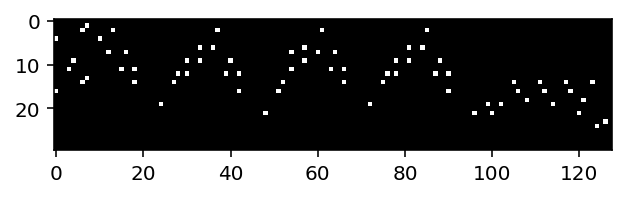

vg_piano/TheSims_TheNeighborhood_Piano.mid
Original Images


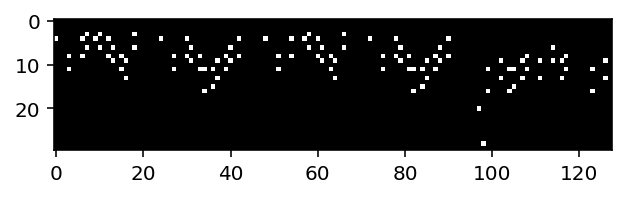

vg_piano/chocomountainpiano.mid
Original Images


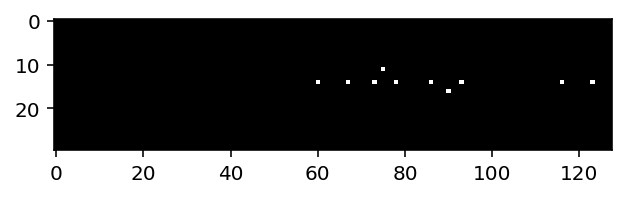

vg_piano/TjsS2OP.mid
Original Images


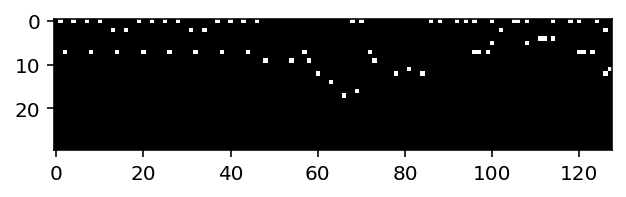

vg_piano/SaveCottagespiano.mid
Original Images


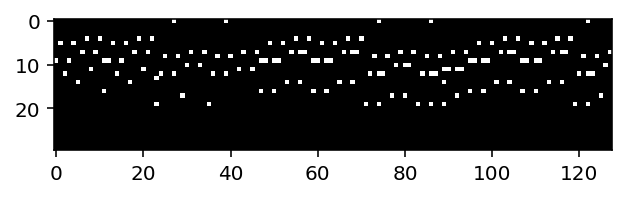

vg_piano/rozen-maiden-kodoku-na-kokoro.mid
Original Images


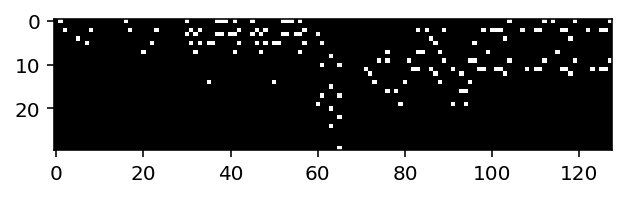

vg_piano/Mario_3.mid
Original Images


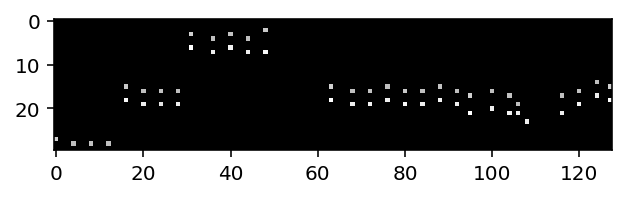

vg_piano/DemonCastlePinnacle.mid
Original Images


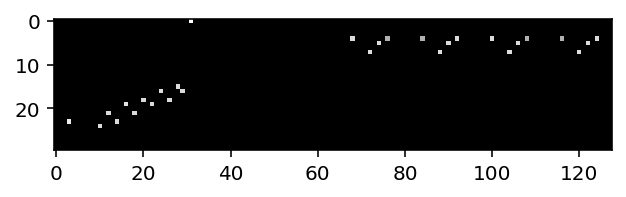

vg_piano/Windfall_Island.mid
Original Images


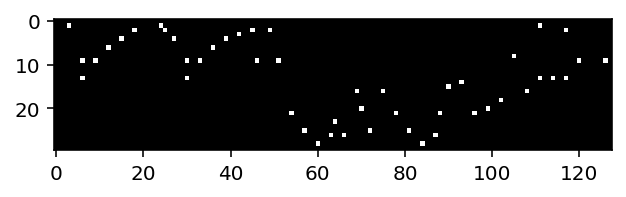

vg_piano/Route_12.mid
Original Images


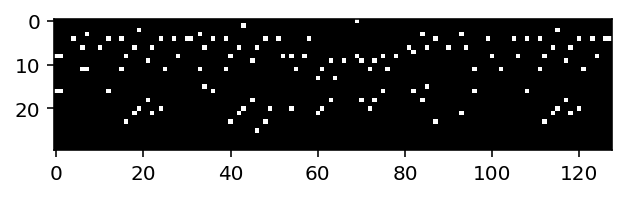

midi.Pattern(format=1, resolution=220, tracks=\
[midi.Track(\
  [midi.NoteOnEvent(tick=0, channel=0, data=[60, 100]),
   midi.NoteOnEvent(tick=100, channel=0, data=[60, 100]),
   midi.NoteOnEvent(tick=0, channel=0, data=[64, 100]),
   midi.NoteOnEvent(tick=0, channel=0, data=[76, 100]),
   midi.NoteOnEvent(tick=384, channel=0, data=[71, 100]),
   midi.NoteOnEvent(tick=128, channel=0, data=[69, 100]),
   midi.NoteOnEvent(tick=256, channel=0, data=[62, 100]),
   midi.NoteOnEvent(tick=0, channel=0, data=[74, 100]),
   midi.NoteOnEvent(tick=128, channel=0, data=[61, 100]),
   midi.NoteOnEvent(tick=0, channel=0, data=[73, 100]),
   midi.NoteOnEvent(tick=384, channel=0, data=[64, 100]),
   midi.NoteOnEvent(tick=256, channel=0, data=[67, 100]),
   midi.NoteOnEvent(tick=128, channel=0, data=[62, 100]),
   midi.NoteOnEvent(tick=256, channel=0, data=[71, 100]),
   midi.NoteOnEvent(tick=128, channel=0, data=[67, 100]),
   midi.NoteOnEvent(tick=256, channel=0, data=[71, 100]),
   midi.NoteOnEvent(

In [5]:
for i in range(10):
    print(result[i].as_posix())
    
    pattern = generateTrack(dataset[i]);
    
    # Save the pattern to disk
    midi.write_midifile(str(i) + ".mid", pattern)

    generateTrackImage(dataset[i])
    
    s = converter.parse(result[i].as_posix())
    s.show('midi')
    s = converter.parse(str(i) + '.mid')
    s.show('midi')
    
print(midi.read_midifile(str(0)+'.mid'))

## Load dataset from csv

In [6]:
train_dataset_fp = np.genfromtxt(r"dataset2.csv",delimiter=",")

x_train = train_dataset_fp[0:500]
x_test = train_dataset_fp[500:600]
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [7]:
print(x_train[10:2000])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Configure neural network
### Params

In [8]:
m = 50 # Batch size
n_z = 4 # Size of latent layer mu and sigma
n_epoch = 100

### Encoder

In [9]:
# Q(z|X) -- encoder
inputs = Input(shape=(WIDTH * HEIGHT,))
h_q = Dense(512, activation='relu')(inputs)
mu = Dense(n_z, activation='linear')(h_q)
log_sigma = Dense(n_z, activation='linear')(h_q)
print(inputs)
print(h_q)
print(mu)
print(log_sigma)

Tensor("input_1:0", shape=(None, 3840), dtype=float32)
Tensor("dense/Identity:0", shape=(None, 512), dtype=float32)
Tensor("dense_1/Identity:0", shape=(None, 4), dtype=float32)
Tensor("dense_2/Identity:0", shape=(None, 4), dtype=float32)


### Latent space

In [10]:
def sample_z(args):
    mu, log_sigma = args
    eps = tf.random.normal(shape=(tf.shape(mu)), mean=0., stddev=1.0)
    #print(mu)
    return mu + K.exp(log_sigma / 2) * eps

# Sample z ~ Q(z|X)
z = Lambda(sample_z)([mu, log_sigma])

### Decoder

In [11]:
# P(X|z) -- decoder
decoder_hidden = Dense(512, activation='relu')
decoder_out = Dense(WIDTH * HEIGHT, activation='sigmoid')

h_p = decoder_hidden(z)
outputs = decoder_out(h_p)

print(decoder_hidden)
print(decoder_out)

print(h_p)
print(outputs)

Tensor("dense_3/Identity:0", shape=(None, 512), dtype=float32)
Tensor("dense_4/Identity:0", shape=(None, 3840), dtype=float32)


### Complete VAE

In [12]:
# Overall VAE model, for reconstruction and training
vae = Model(inputs, outputs)

# Encoder model, to encode input into latent variable
# We use the mean as the output as it is the center point, the representative of the gaussian
encoder = Model(inputs, mu)

# Generator model, generate new data given latent variable z
d_in = Input(shape=(n_z,))
d_h = decoder_hidden(d_in)
d_out = decoder_out(d_h)
decoder = Model(d_in, d_out)

### Loss function

In [13]:
#def vae_loss(y_true, y_pred):
#    """ Calculate loss = reconstruction loss + KL loss for each data in minibatch """
#    # E[log P(X|z)]
#    recon = K.sum(K.binary_crossentropy(y_pred, y_true), axis=-1)
#    # D_KL(Q(z|X) || P(z|X)); calculate in closed form as both dist. are Gaussian
#    kl = 0.5 * K.sum(K.exp(log_sigma) + K.square(mu) - 1. - log_sigma, axis=-1)
#  
#    return recon + kl

def vae_loss(x, x_decoded_mean):
    xent_loss = WIDTH * HEIGHT * K.binary_crossentropy(x, x_decoded_mean)
    #kl_loss = - 0.5 * K.sum(1 + log_sigma - K.square(mu) - K.exp(log_sigma), axis=-1)
    #print("xent_loss:",xent_loss)
    #print("log_sigma,:",log_sigma)
    #print("mu:",mu)
    #print("KL:",kl_loss)
    #print("xent_loss + kl:",xent_loss)
    return xent_loss # TODO : KL Loss doesnt work https://wiseodd.github.io/techblog/2016/12/10/variational-autoencoder/

## Train VAE

In [14]:
print(x_train[0])
print(x_test[0])

[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]


In [15]:
tf.config.experimental_run_functions_eagerly(True) # Todo remove because it causes perf issues
vae.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01,clipnorm=1), 
    loss=vae_loss)
history = vae.fit(
    x_train, 
    x_train, 
    shuffle=True,
    batch_size=m,
    validation_data=(x_test, x_test),
    epochs=n_epoch)
print(history.history)

Epoch 1/100
10/10 [==============================] - 0s 48ms/step - loss: 1056.8727 - val_loss: 486.9528
Epoch 2/100
10/10 [==============================] - 0s 48ms/step - loss: 502.5567 - val_loss: 411.6280
Epoch 3/100
10/10 [==============================] - 0s 48ms/step - loss: 403.9164 - val_loss: 365.9361
Epoch 4/100
10/10 [==============================] - 0s 47ms/step - loss: 361.3520 - val_loss: 358.8811
Epoch 5/100
10/10 [==============================] - 0s 47ms/step - loss: 343.4778 - val_loss: 335.6678
Epoch 6/100
10/10 [==============================] - 0s 48ms/step - loss: 325.0866 - val_loss: 327.0153
Epoch 7/100
10/10 [==============================] - 0s 50ms/step - loss: 315.5287 - val_loss: 323.6033
Epoch 8/100
10/10 [==============================] - 0s 48ms/step - loss: 309.7600 - val_loss: 323.2988
Epoch 9/100
10/10 [==============================] - 0s 49ms/step - loss: 303.3300 - val_loss: 320.2153
Epoch 10/100
10/10 [==============================] - 1s 50ms/s

10/10 [==============================] - 0s 49ms/step - loss: 120.4582 - val_loss: 551.7079
Epoch 80/100
10/10 [==============================] - 0s 47ms/step - loss: 115.2822 - val_loss: 549.6394
Epoch 81/100
10/10 [==============================] - 0s 47ms/step - loss: 117.7889 - val_loss: 555.7003
Epoch 82/100
10/10 [==============================] - 0s 48ms/step - loss: 117.1423 - val_loss: 561.4840
Epoch 83/100
10/10 [==============================] - 0s 48ms/step - loss: 112.6230 - val_loss: 561.3594
Epoch 84/100
10/10 [==============================] - 0s 48ms/step - loss: 115.9513 - val_loss: 563.4059
Epoch 85/100
10/10 [==============================] - 0s 47ms/step - loss: 111.1015 - val_loss: 561.4025
Epoch 86/100
10/10 [==============================] - 0s 44ms/step - loss: 110.3669 - val_loss: 571.4682
Epoch 87/100
10/10 [==============================] - 0s 42ms/step - loss: 106.3981 - val_loss: 564.7101
Epoch 88/100
10/10 [==============================] - 0s 47ms/step -

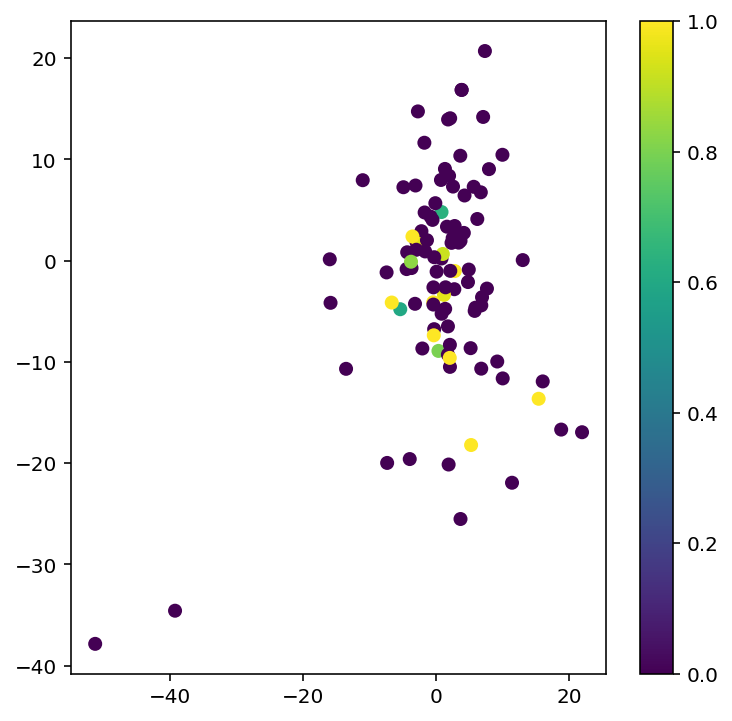

In [16]:
# build a model to project inputs on the latent space
encoder = Model(inputs, mu)# display a 2D plot of the digit classes in the latent space
x_test_encoded = encoder.predict(x_test, batch_size=m)
plt.figure(figsize=(6, 6))
plt.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1], c=x_test[:, 0])
plt.colorbar()
plt.show()

## Evaluate trained model

In [17]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = vae.evaluate(x_test, x_test, batch_size=m)
print("test loss, test acc:", results)

Evaluate on test data
2/2 [==============================] - 0s 5ms/step - loss: 607.0836
test loss, test acc: 607.0835571289062


# Generate predictions (probabilities -- the output of the last layer)

File  vg_piano/GameCornerRag.mid
Original
Original Images


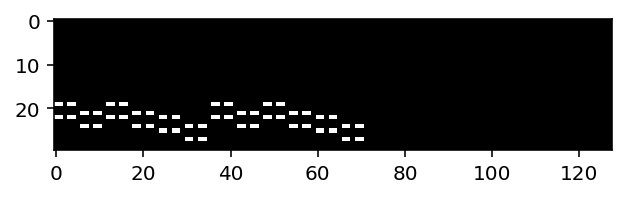

Reproduction
Original Images


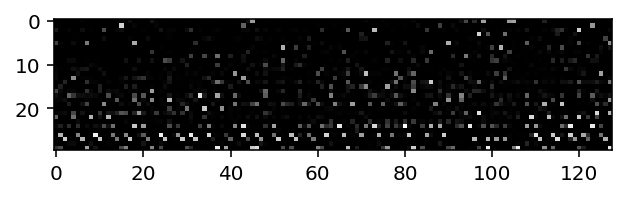

File  vg_piano/TheSims_TheNeighborhood_Piano.mid
Original
Original Images


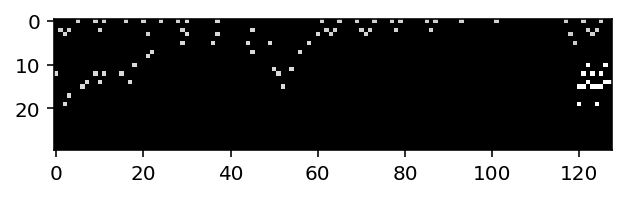

Reproduction
Original Images


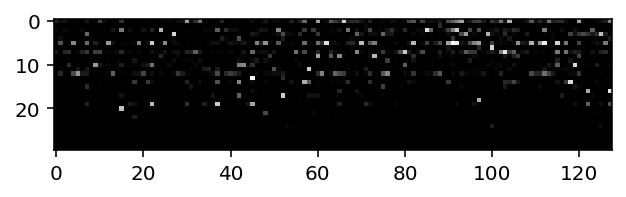

File  vg_piano/chocomountainpiano.mid
Original
Original Images


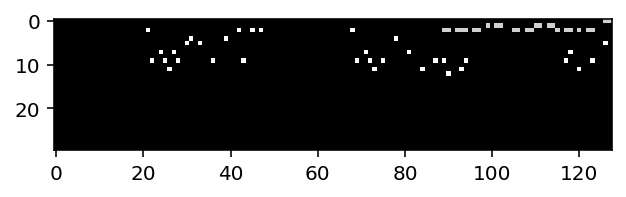

Reproduction
Original Images


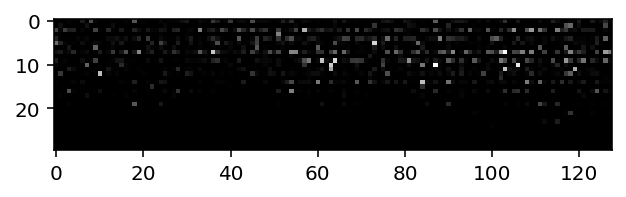

File  vg_piano/TjsS2OP.mid
Original
Original Images


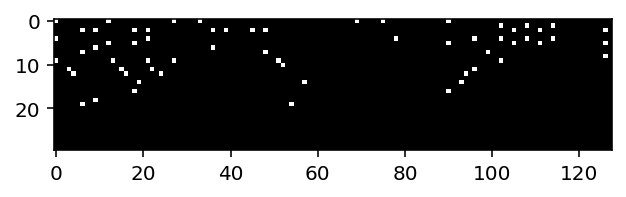

Reproduction
Original Images


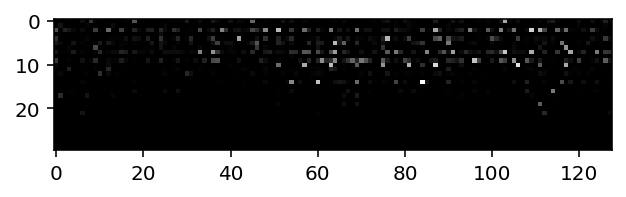

File  vg_piano/SaveCottagespiano.mid
Original
Original Images


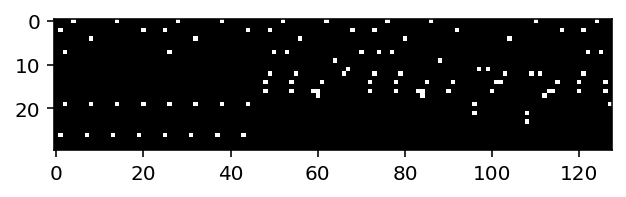

Reproduction
Original Images


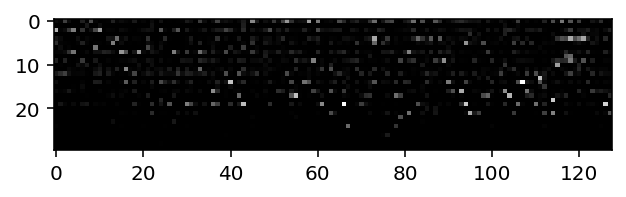

File  vg_piano/rozen-maiden-kodoku-na-kokoro.mid
Original
Original Images


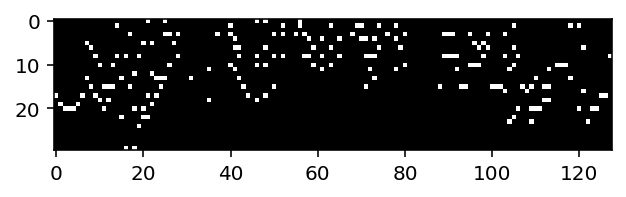

Reproduction
Original Images


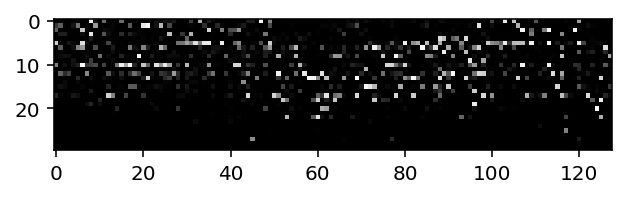

File  vg_piano/Mario_3.mid
Original
Original Images


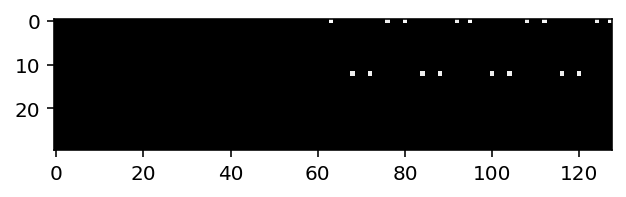

Reproduction
Original Images


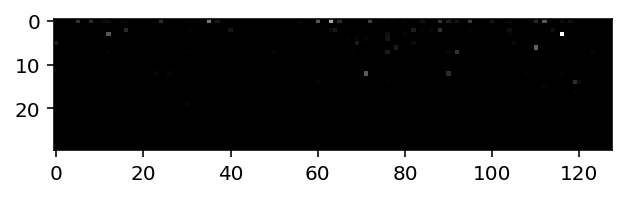

File  vg_piano/DemonCastlePinnacle.mid
Original
Original Images


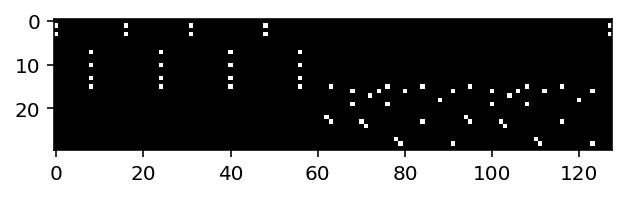

Reproduction
Original Images


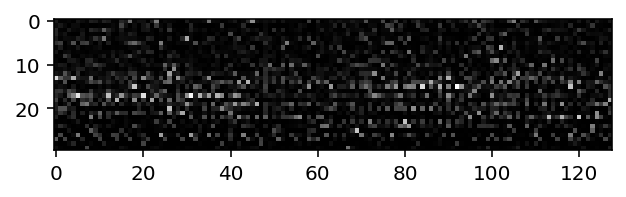

File  vg_piano/Windfall_Island.mid
Original
Original Images


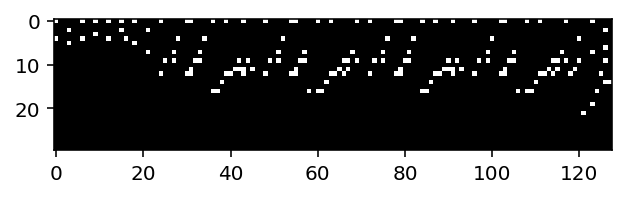

Reproduction
Original Images


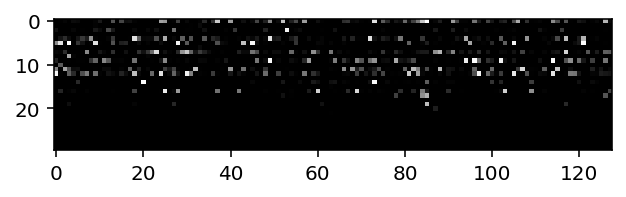

File  vg_piano/Route_12.mid
Original
Original Images


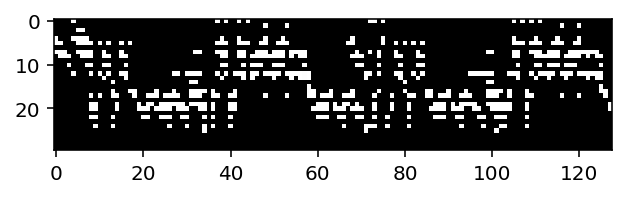

Reproduction
Original Images


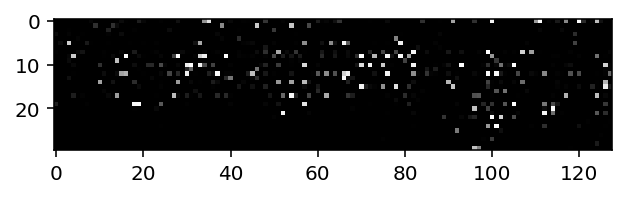

File  vg_piano/metalman.mid
Original
Original Images


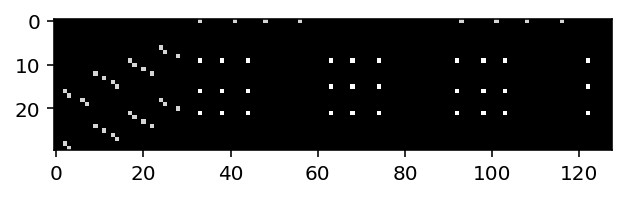

Reproduction
Original Images


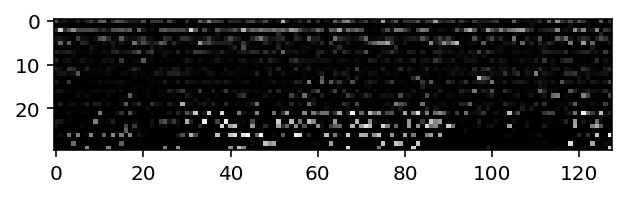

File  vg_piano/sandcan.mid
Original
Original Images


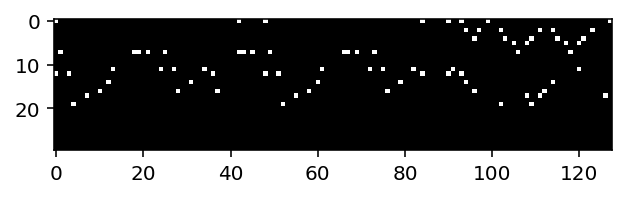

Reproduction
Original Images


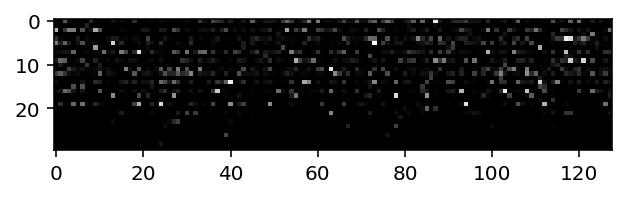

File  vg_piano/Ff7-Jenova_Absolute.mid
Original
Original Images


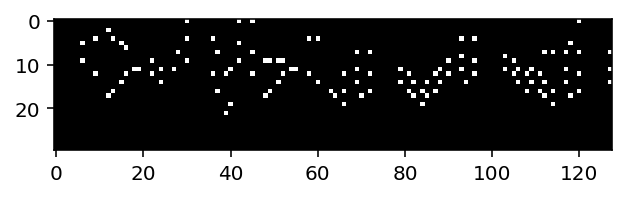

Reproduction
Original Images


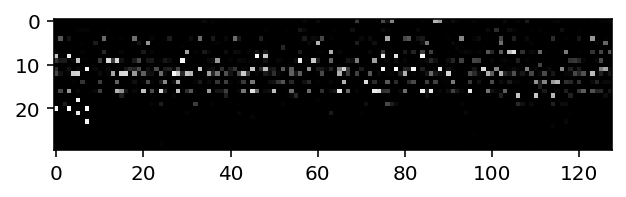

File  vg_piano/ff9-battle-piano.mid
Original
Original Images


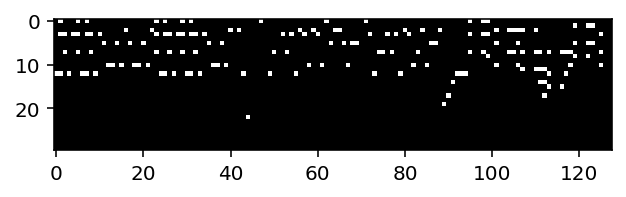

Reproduction
Original Images


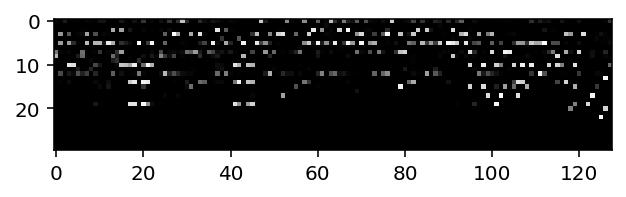

File  vg_piano/Gestation.mid
Original
Original Images


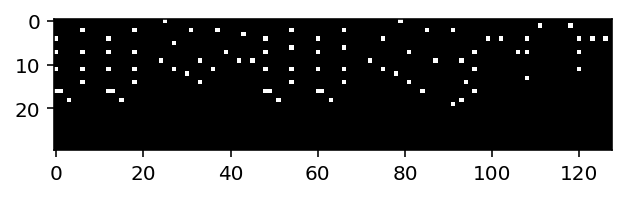

Reproduction
Original Images


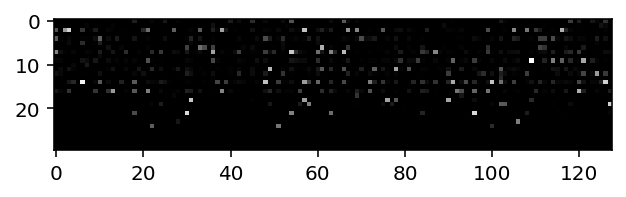

File  vg_piano/CastlevaniaLevel1AS.mid
Original
Original Images


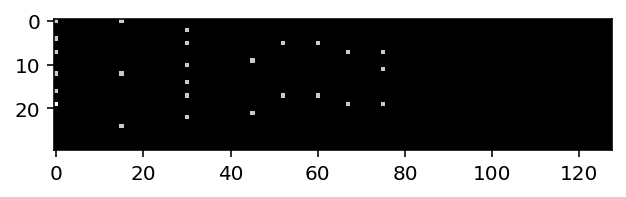

Reproduction
Original Images


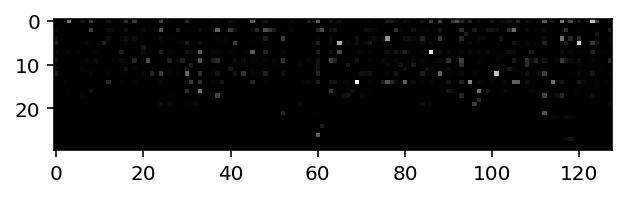

File  vg_piano/FF8_Shuffle_or_boogie_pc.mid
Original
Original Images


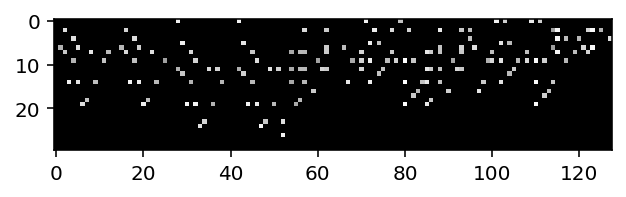

Reproduction
Original Images


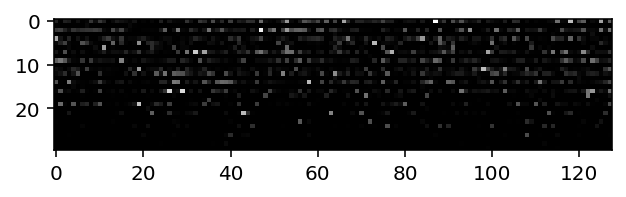

File  vg_piano/HeroesOfMightAndMagic3-MainMenuPiano.mid
Original
Original Images


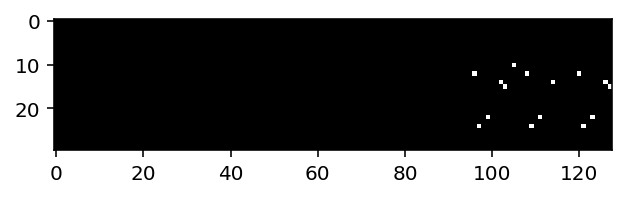

Reproduction
Original Images


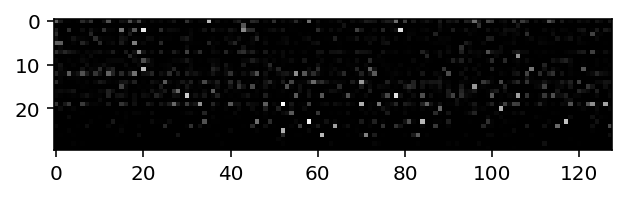

File  vg_piano/BKendsolo.mid
Original
Original Images


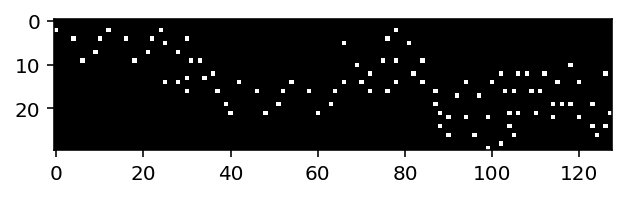

Reproduction
Original Images


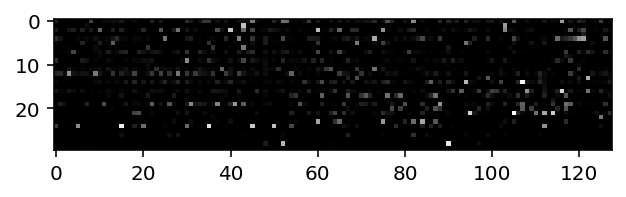

File  vg_piano/sth2oilARR.mid
Original
Original Images


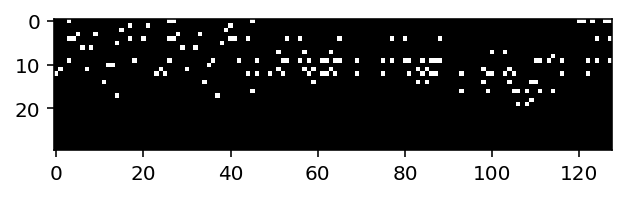

Reproduction
Original Images


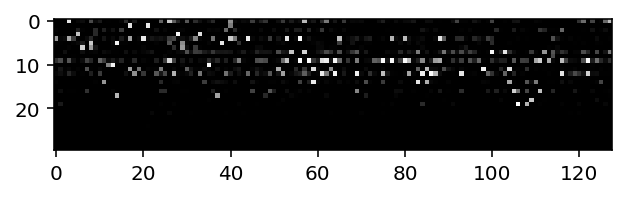

File  vg_piano/Hyrule_Castle_-_Zelda_A_Link_to_the_Past.mid
Original
Original Images


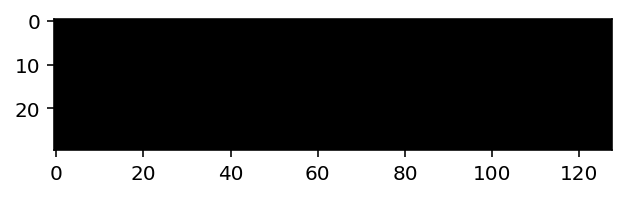

Reproduction
Original Images


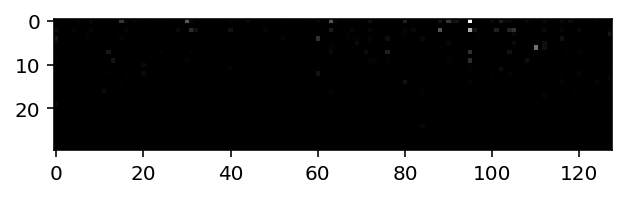

File  vg_piano/ahead_on_our_way_piano.mid
Original
Original Images


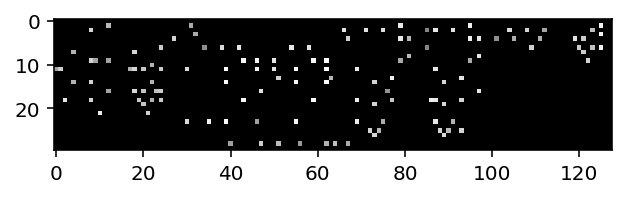

Reproduction
Original Images


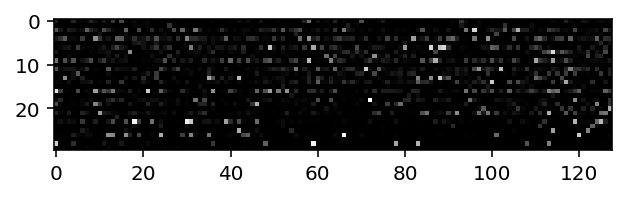

File  vg_piano/smbt.mid
Original
Original Images


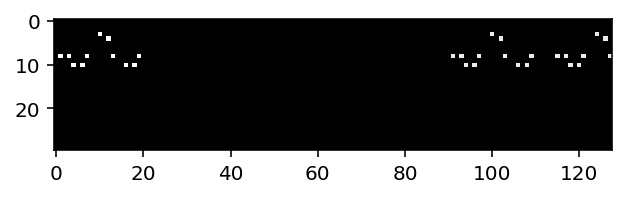

Reproduction
Original Images


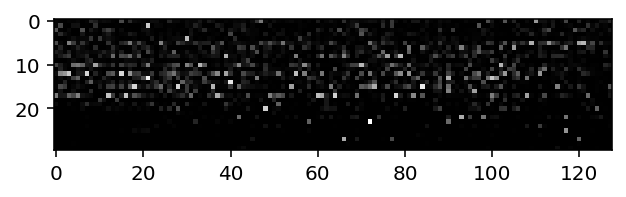

File  vg_piano/Metal_Gear_Solid_2-_Piano.mid
Original
Original Images


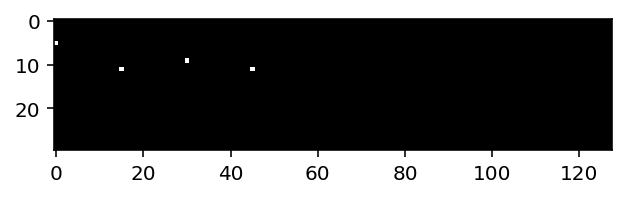

Reproduction
Original Images


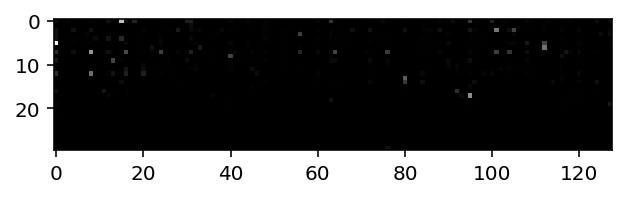

File  vg_piano/Z8.mid
Original
Original Images


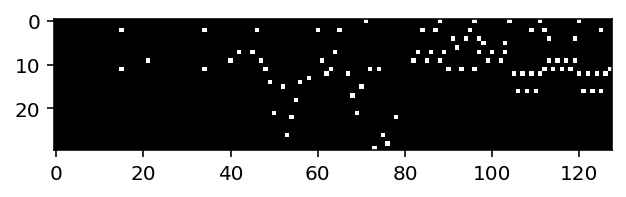

Reproduction
Original Images


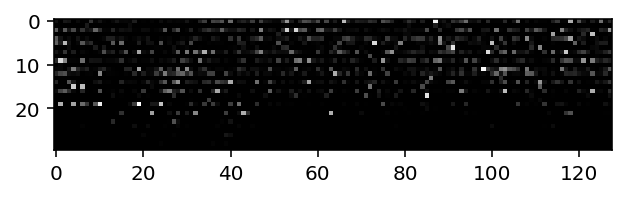

File  vg_piano/trailblood.mid
Original
Original Images


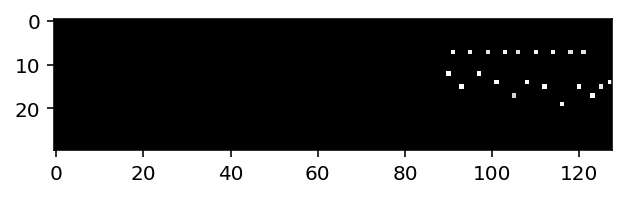

Reproduction
Original Images


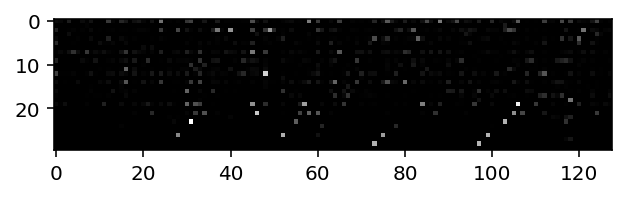

File  vg_piano/balamb.mid
Original
Original Images


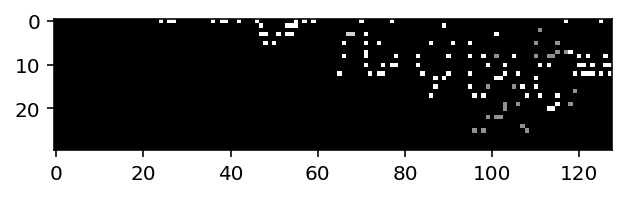

Reproduction
Original Images


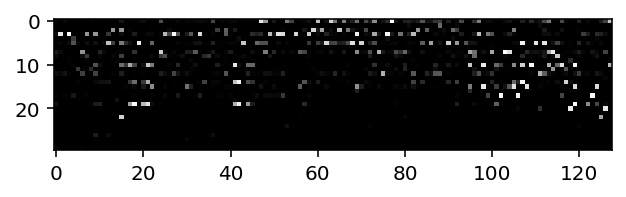

File  vg_piano/SnakeMan_Stage.mid
Original
Original Images


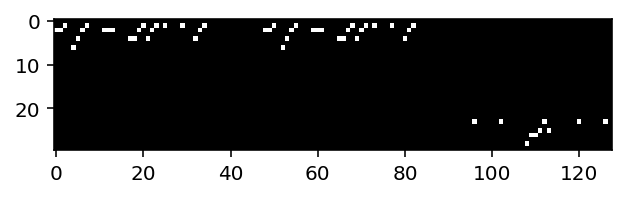

Reproduction
Original Images


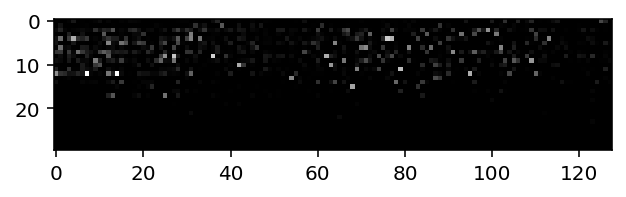

File  vg_piano/cpt_clawswamp.mid
Original
Original Images


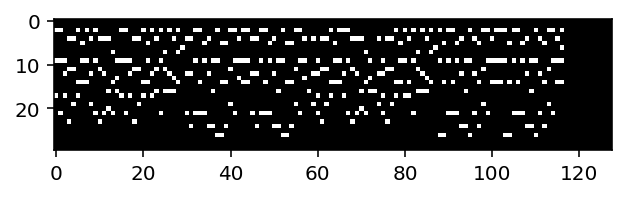

Reproduction
Original Images


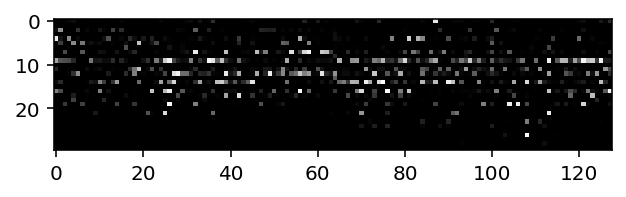

File  vg_piano/bomb.mid
Original
Original Images


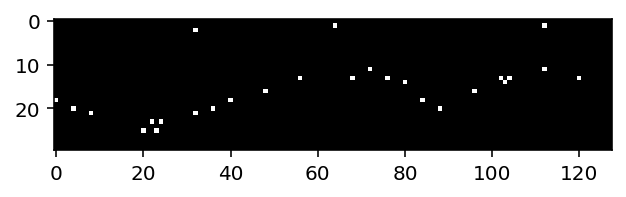

Reproduction
Original Images


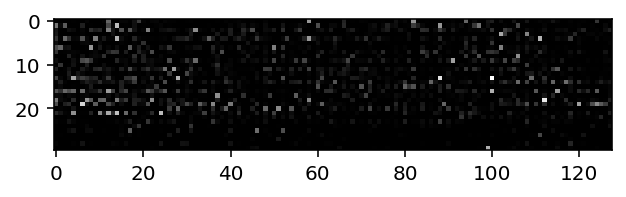

File  vg_piano/Kid_Icarus.mid
Original
Original Images


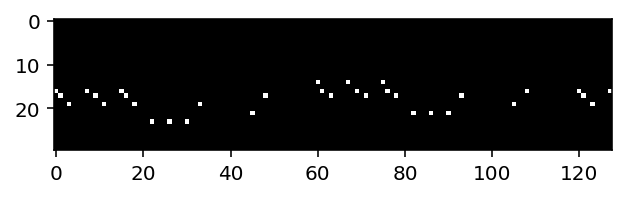

Reproduction
Original Images


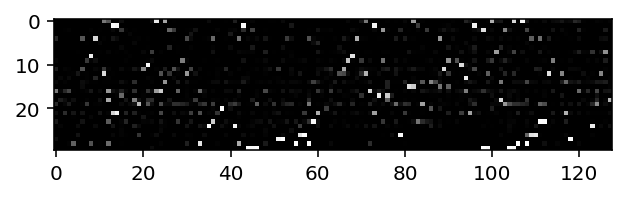

File  vg_piano/5_and_6.mid
Original
Original Images


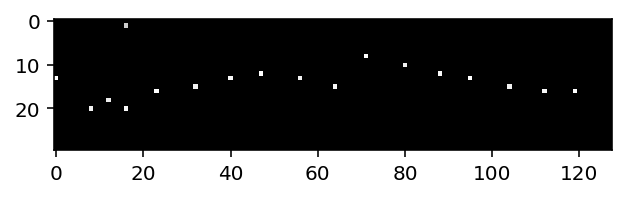

Reproduction
Original Images


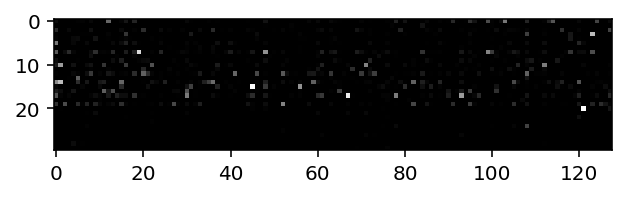

File  vg_piano/BanjoTooie.mid
Original
Original Images


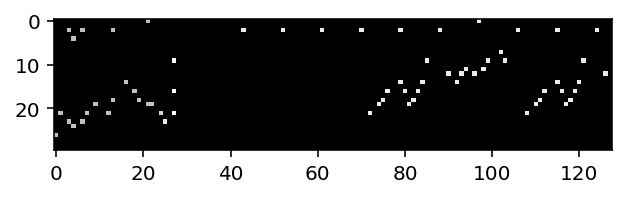

Reproduction
Original Images


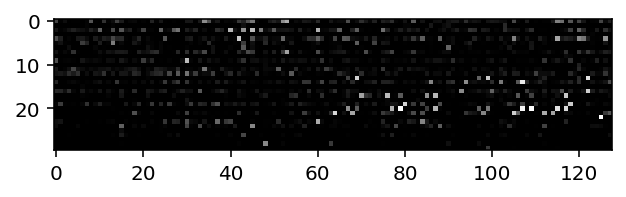

File  vg_piano/Super-Nintendo_Super-Mario-World_Ending.mid
Original
Original Images


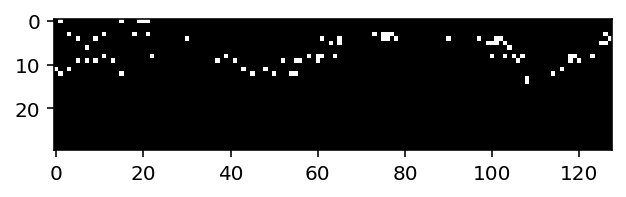

Reproduction
Original Images


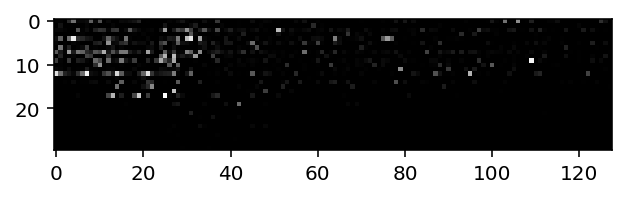

File  vg_piano/TetrisNameAS.mid
Original
Original Images


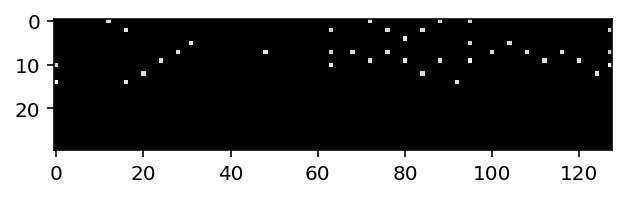

Reproduction
Original Images


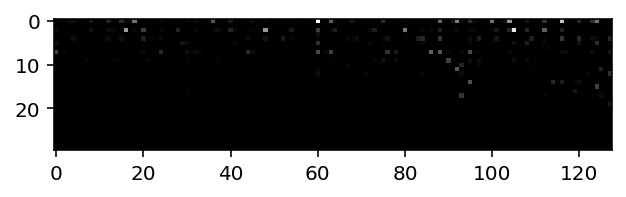

File  vg_piano/DOS.mid
Original
Original Images


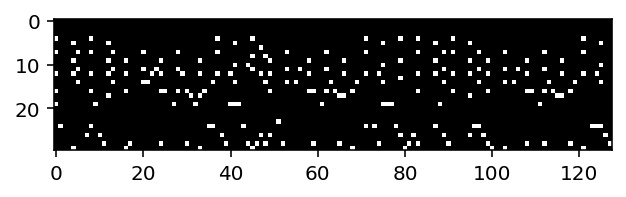

Reproduction
Original Images


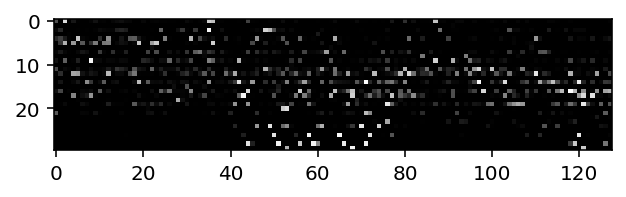

File  vg_piano/surf-1.mid
Original
Original Images


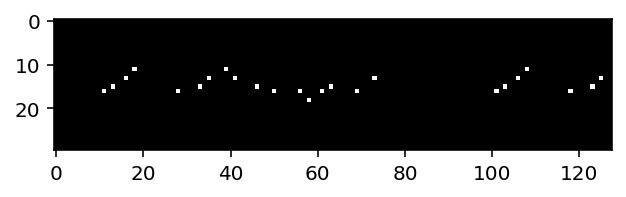

Reproduction
Original Images


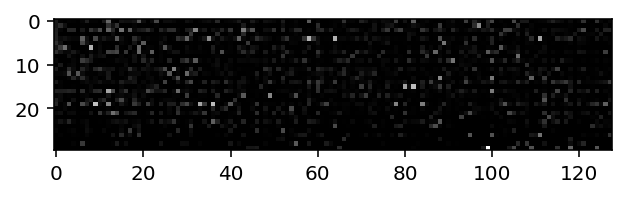

File  vg_piano/FF3_Battle_(Piano).mid
Original
Original Images


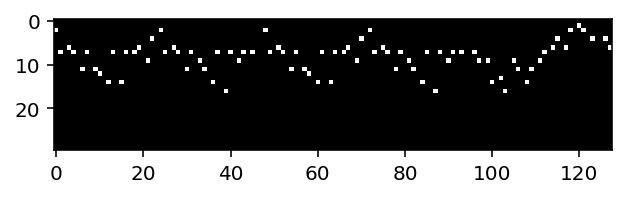

Reproduction
Original Images


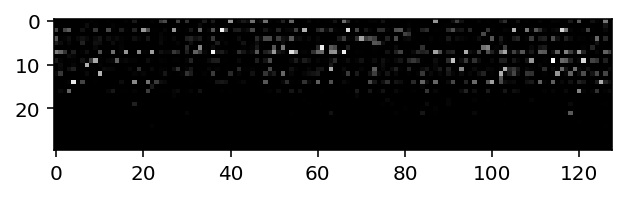

File  vg_piano/circus_charlie_1_4.mid
Original
Original Images


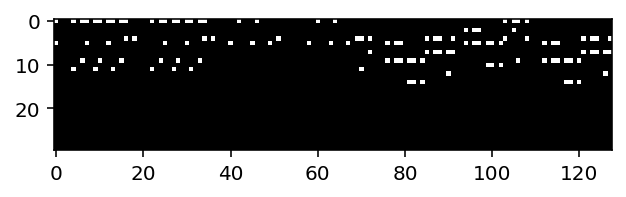

Reproduction
Original Images


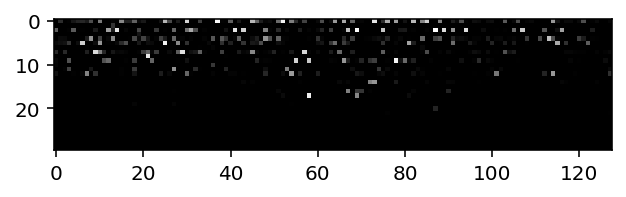

File  vg_piano/Midnas_Desperation_-_Arranged.mid
Original
Original Images


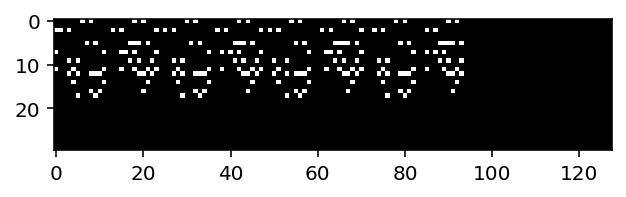

Reproduction
Original Images


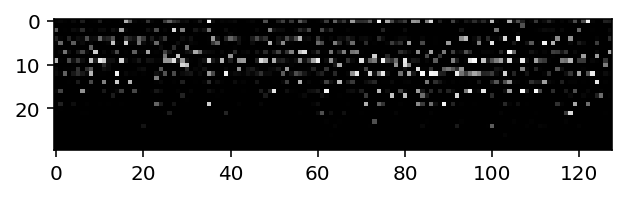

File  vg_piano/rose_ghost.mid
Original
Original Images


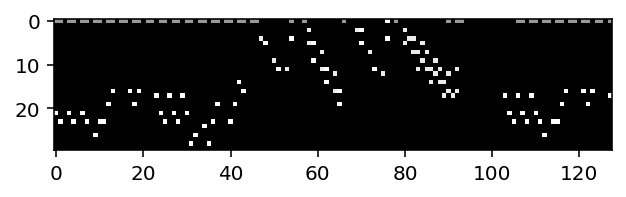

Reproduction
Original Images


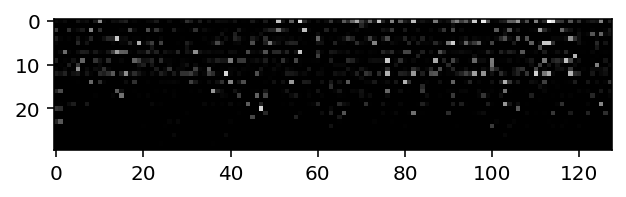

File  vg_piano/GE64-damsolo.mid
Original
Original Images


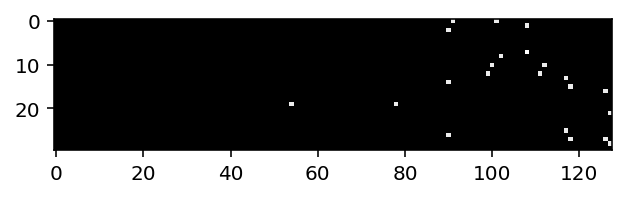

Reproduction
Original Images


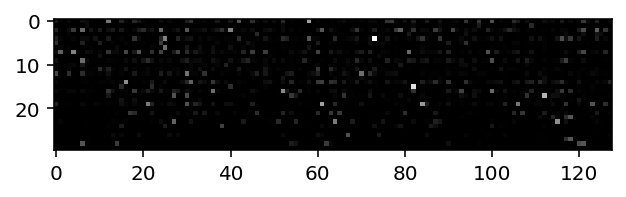

File  vg_piano/Cohens_Masterpiece.mid
Original
Original Images


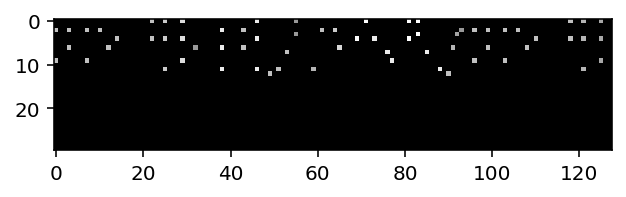

Reproduction
Original Images


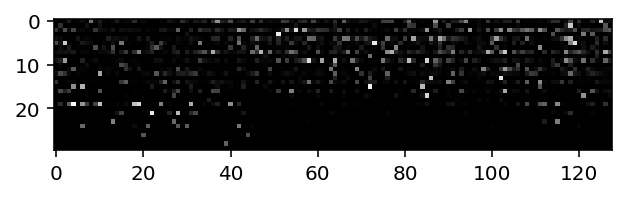

File  vg_piano/Suteki_Da_Ne_(Piano_Version).mid
Original
Original Images


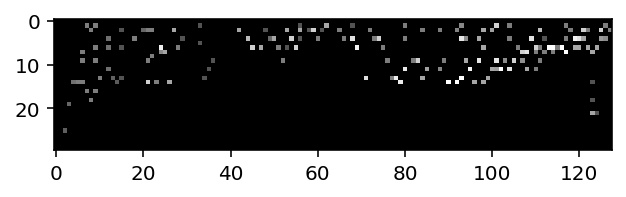

Reproduction
Original Images


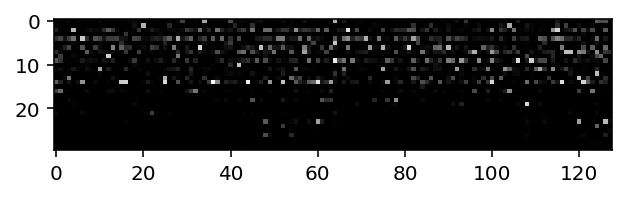

File  vg_piano/h.mid
Original
Original Images


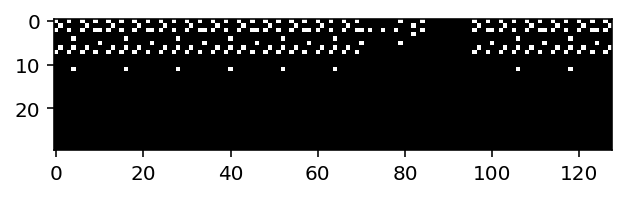

Reproduction
Original Images


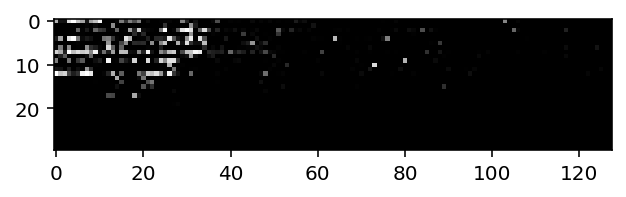

File  vg_piano/Mother_Queen_Marys_Castle.mid
Original
Original Images


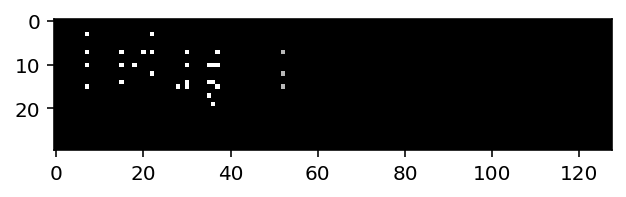

Reproduction
Original Images


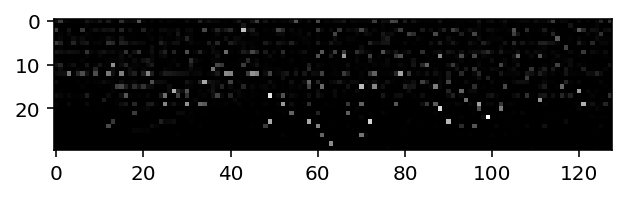

File  vg_piano/BaWC.mid
Original
Original Images


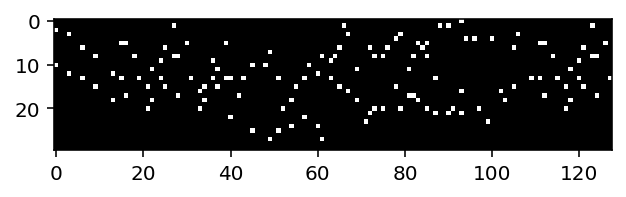

Reproduction
Original Images


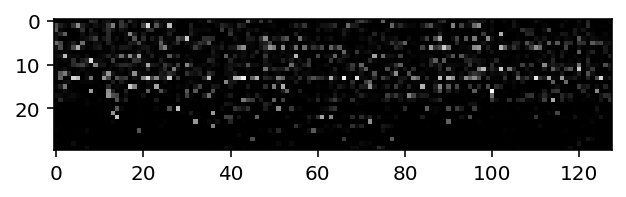

File  vg_piano/tomahawk.mid
Original
Original Images


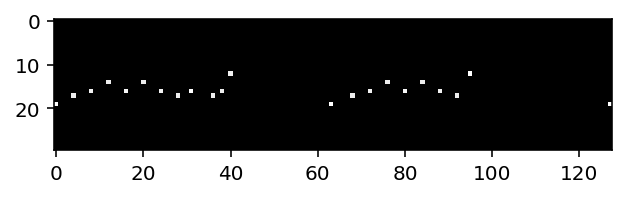

Reproduction
Original Images


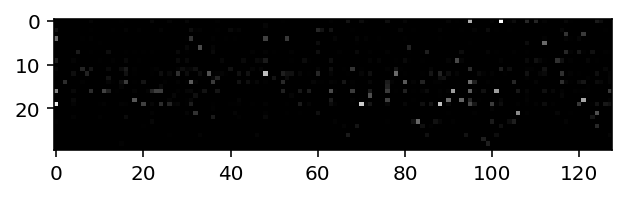

File  vg_piano/piano.mid
Original
Original Images


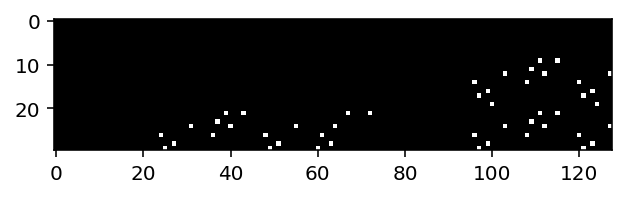

Reproduction
Original Images


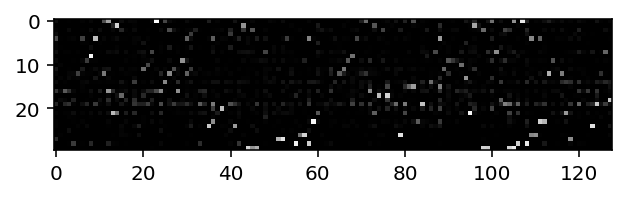

File  vg_piano/hymn.mid
Original
Original Images


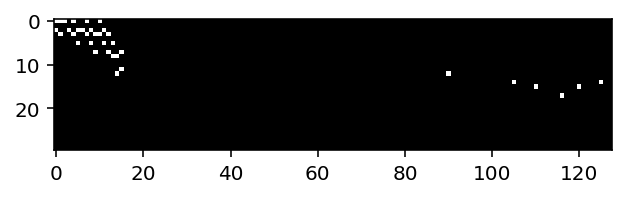

Reproduction
Original Images


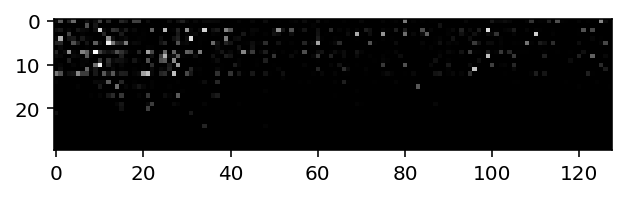

File  vg_piano/serenade_of_water-piano.mid
Original
Original Images


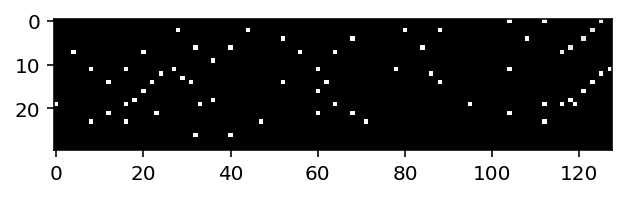

Reproduction
Original Images


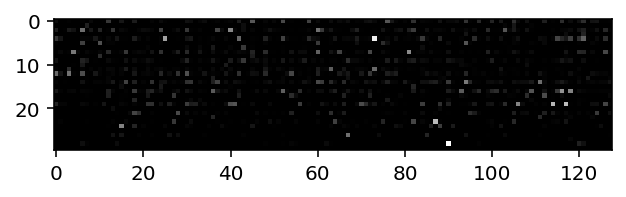

File  vg_piano/slideshw.mid
Original
Original Images


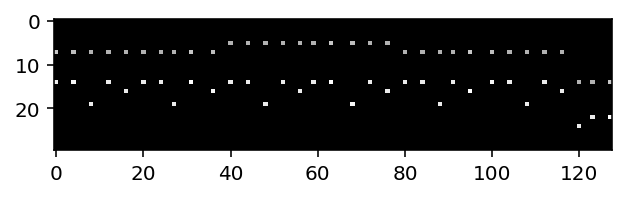

Reproduction
Original Images


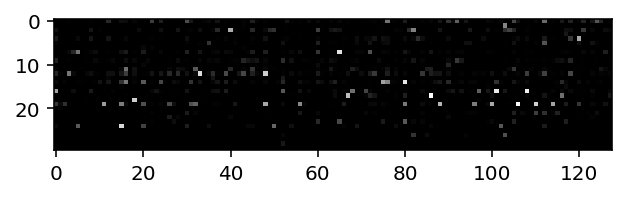

File  vg_piano/lightwld.mid
Original
Original Images


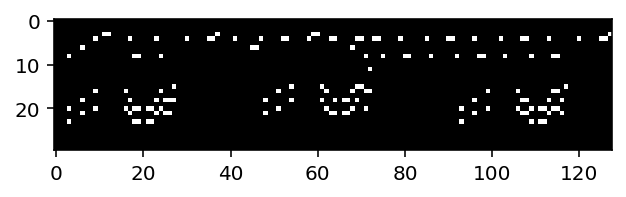

Reproduction
Original Images


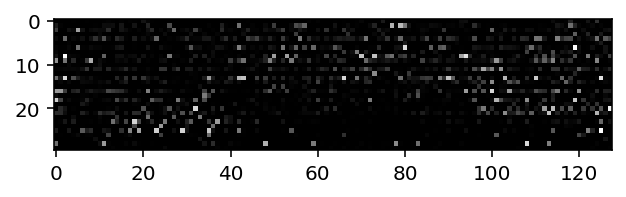

File  vg_piano/plant.mid
Original
Original Images


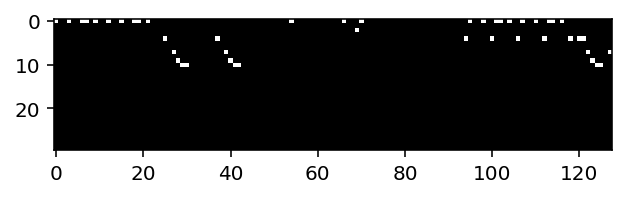

Reproduction
Original Images


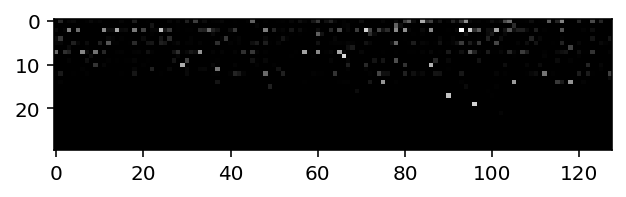

File  vg_piano/caitsith.mid
Original
Original Images


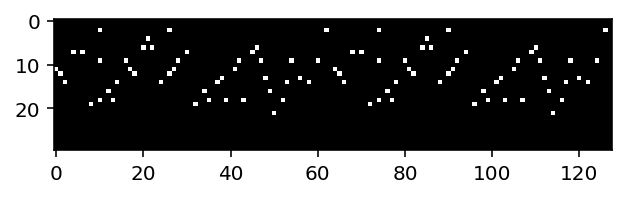

Reproduction
Original Images


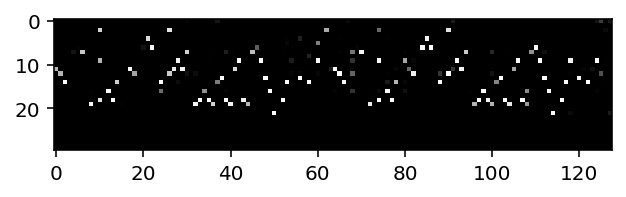

File  vg_piano/At_Zanarkand_Piano_Collection_(Unofficial).mid
Original
Original Images


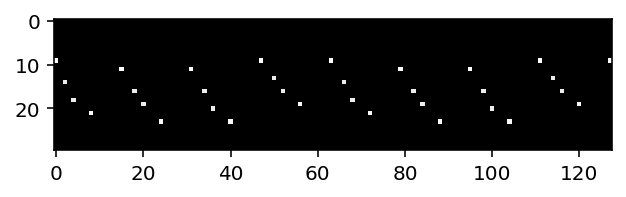

Reproduction
Original Images


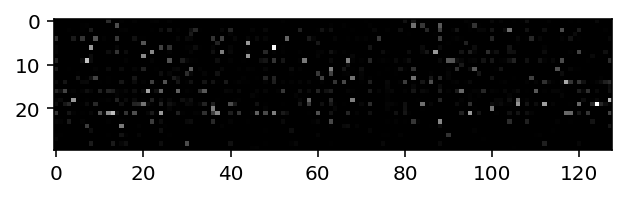

File  vg_piano/GE64-statsolo.mid
Original
Original Images


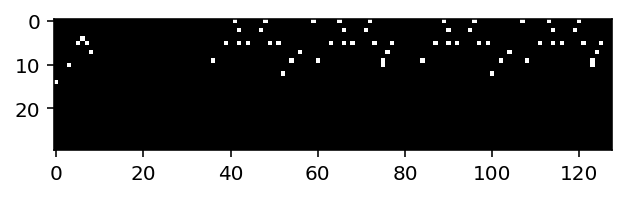

Reproduction
Original Images


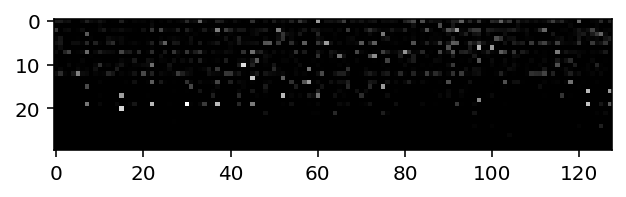

File  vg_piano/n64_f0x_sm01_piano.mid
Original
Original Images


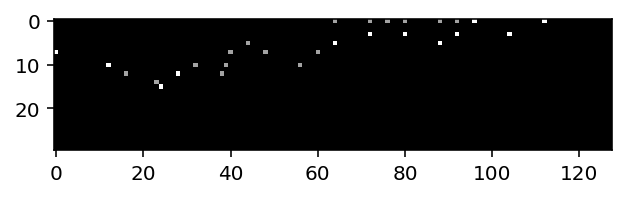

Reproduction
Original Images


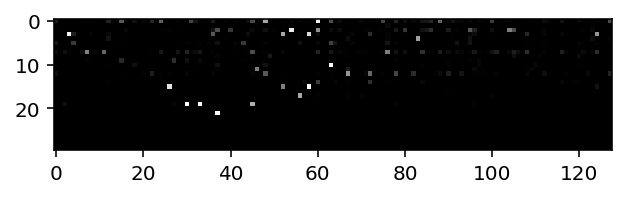

File  vg_piano/finalbosspiano.mid
Original
Original Images


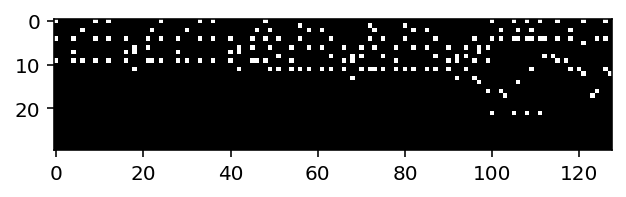

Reproduction
Original Images


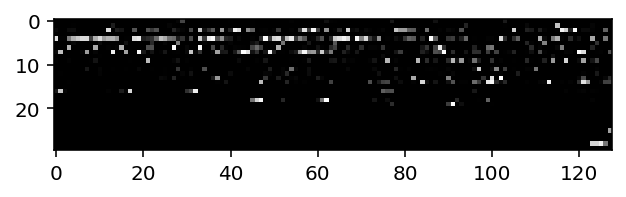

File  vg_piano/edc.mid
Original
Original Images


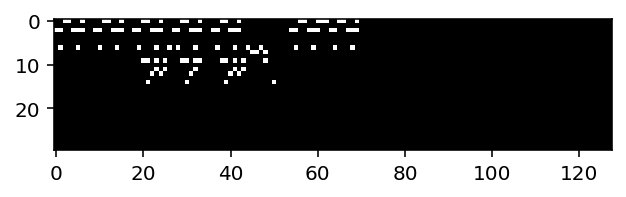

Reproduction
Original Images


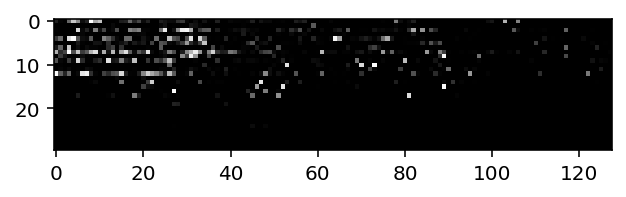

File  vg_piano/Oppressed.mid
Original
Original Images


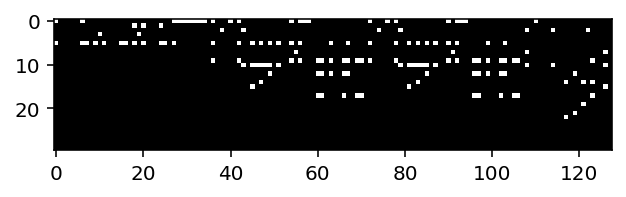

Reproduction
Original Images


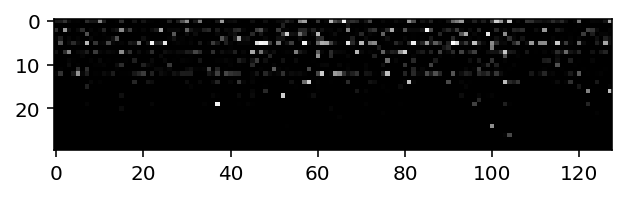

File  vg_piano/Europe(piano).mid
Original
Original Images


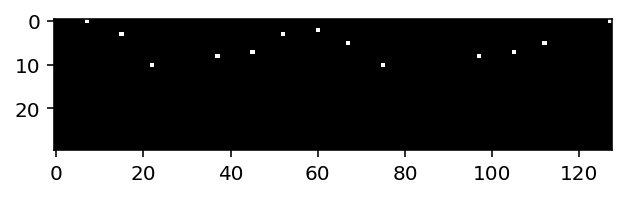

Reproduction
Original Images


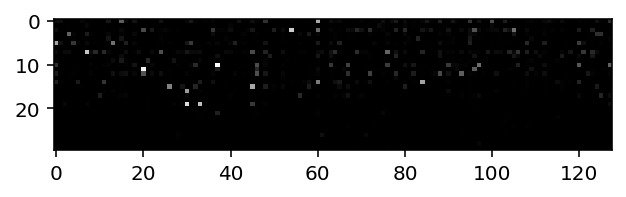

File  vg_piano/ssbstarfoxpiano.mid
Original
Original Images


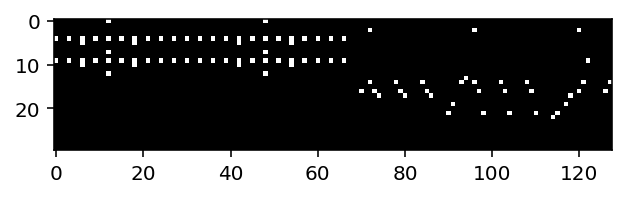

Reproduction
Original Images


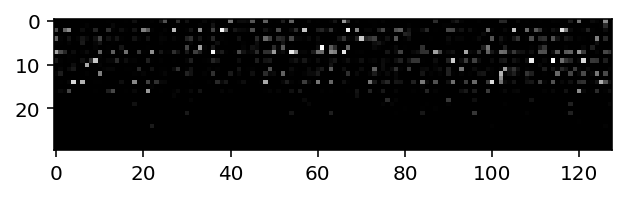

File  vg_piano/GameOverPiano.mid
Original
Original Images


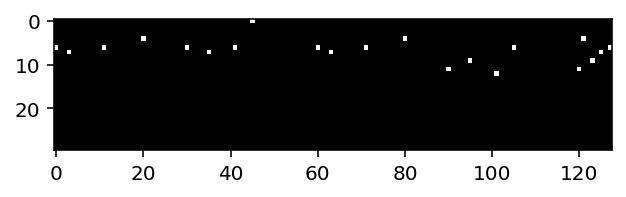

Reproduction
Original Images


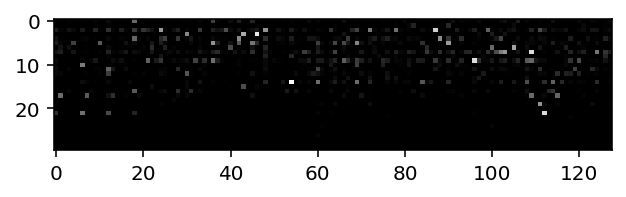

File  vg_piano/ff4-airship.mid
Original
Original Images


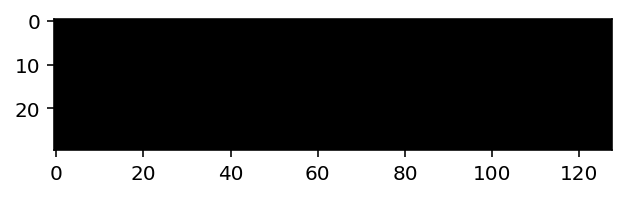

Reproduction
Original Images


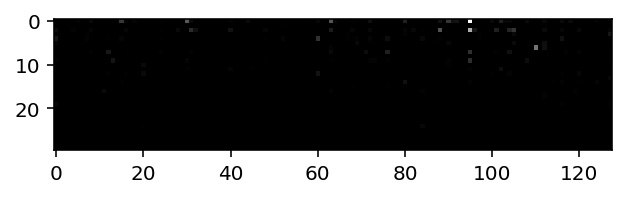

File  vg_piano/SMB3_Overworld_2.mid
Original
Original Images


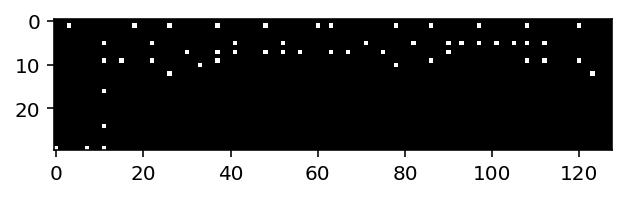

Reproduction
Original Images


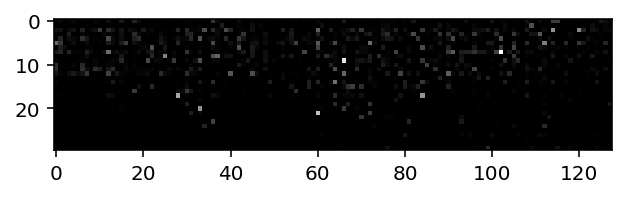

File  vg_piano/MegaManVI_Final_boss_piano_version_C-major.mid
Original
Original Images


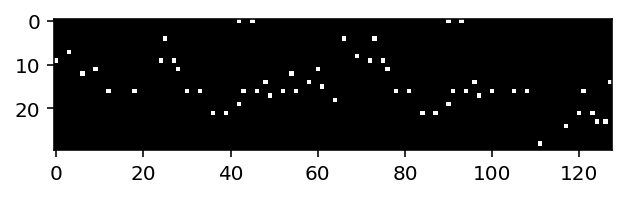

Reproduction
Original Images


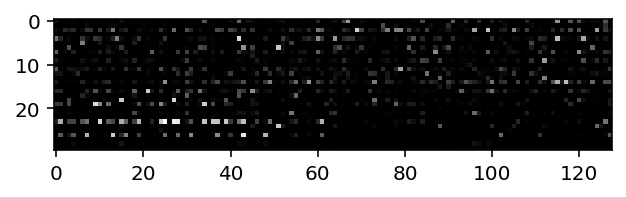

File  vg_piano/Route_1.mid
Original
Original Images


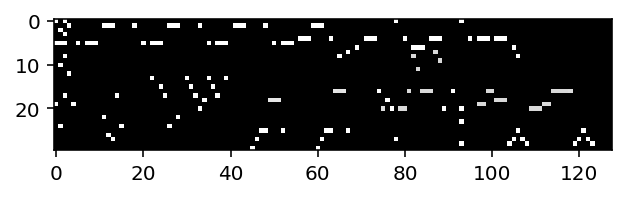

Reproduction
Original Images


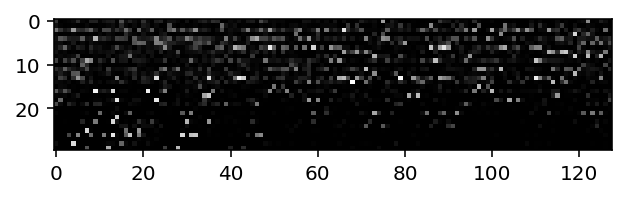

File  vg_piano/Mario_Dies_Super_Mario_World.mid
Original
Original Images


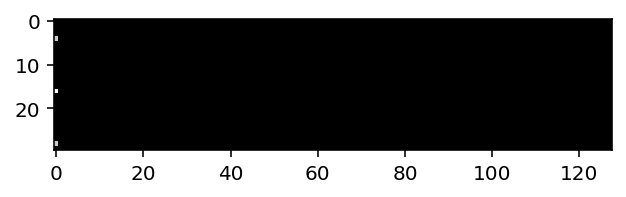

Reproduction
Original Images


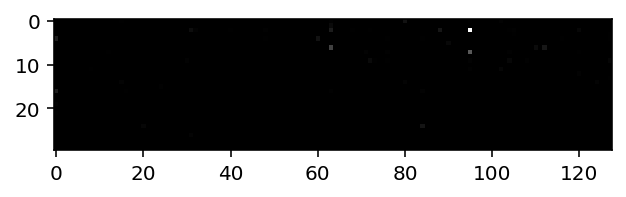

File  vg_piano/SSBB_PitUnderWorld.mid
Original
Original Images


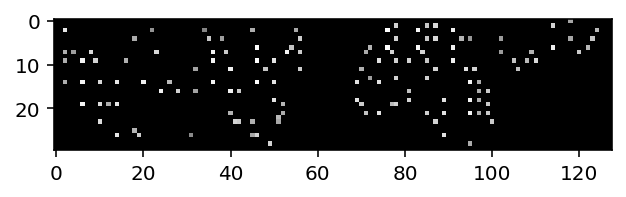

Reproduction
Original Images


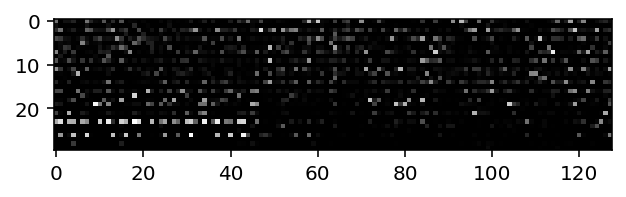

File  vg_piano/Serenade.mid
Original
Original Images


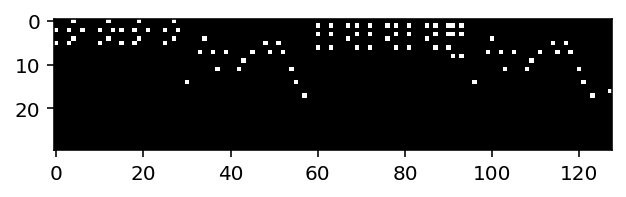

Reproduction
Original Images


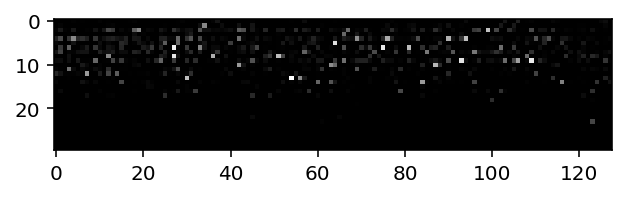

File  vg_piano/magustheme-piano.mid
Original
Original Images


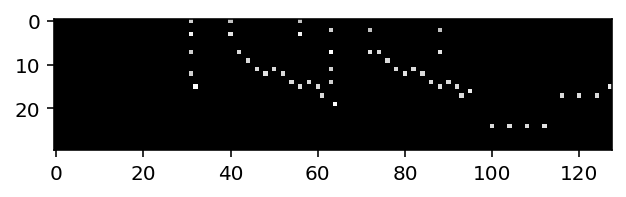

Reproduction
Original Images


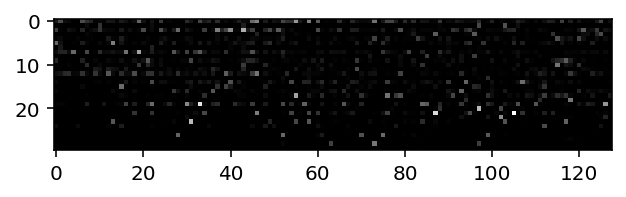

File  vg_piano/BiancoHills.mid
Original
Original Images


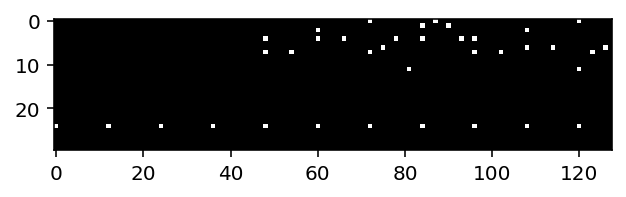

Reproduction
Original Images


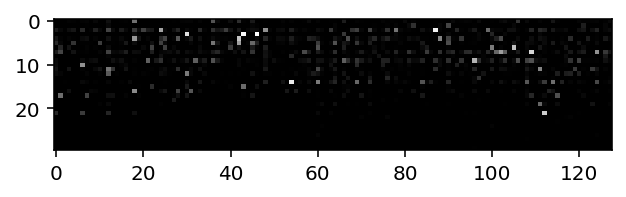

File  vg_piano/xb_kh_endworldbattle_p.mid
Original
Original Images


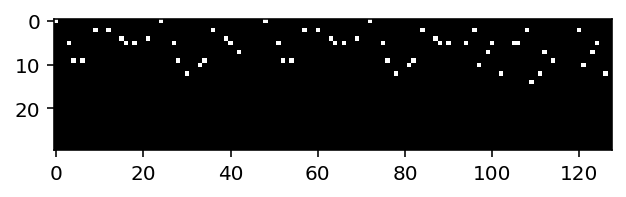

Reproduction
Original Images


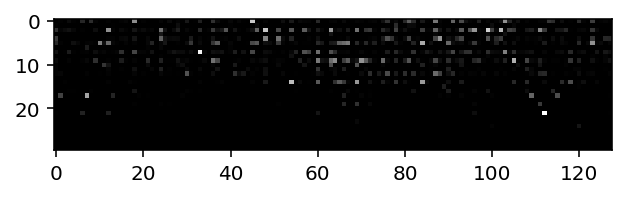

File  vg_piano/ff7themep.mid
Original
Original Images


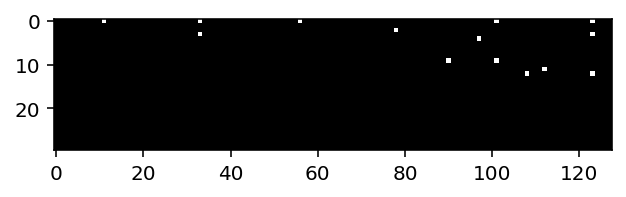

Reproduction
Original Images


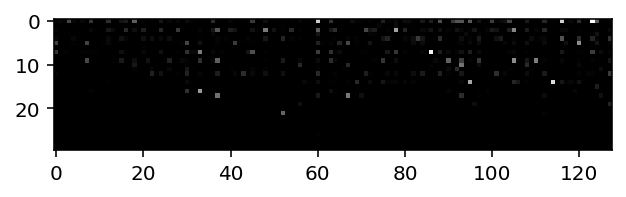

File  vg_piano/faxoverworld.mid
Original
Original Images


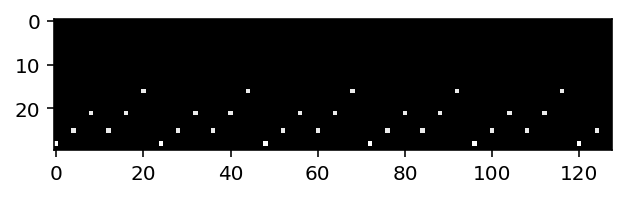

Reproduction
Original Images


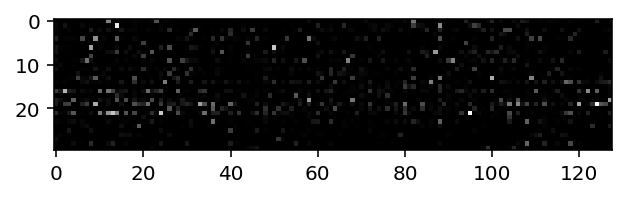

File  vg_piano/FFVII_BATTLE.mid
Original
Original Images


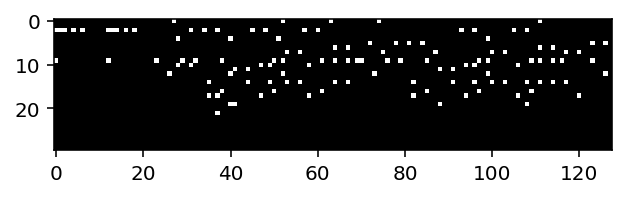

Reproduction
Original Images


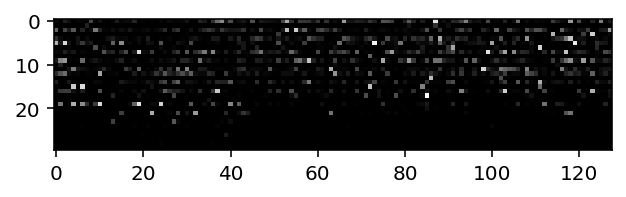

File  vg_piano/StarFestival.mid
Original
Original Images


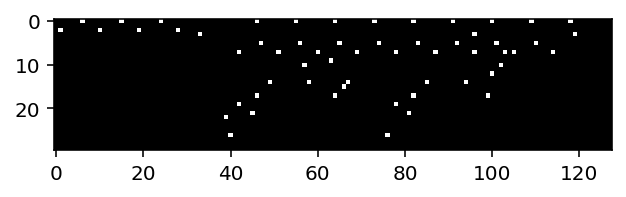

Reproduction
Original Images


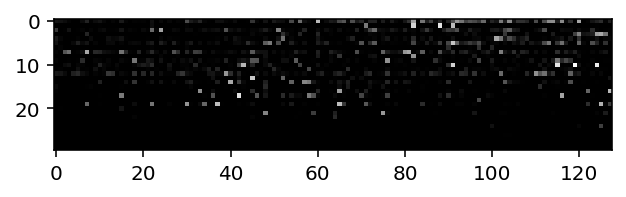

File  vg_piano/electric_de_chocobo.mid
Original
Original Images


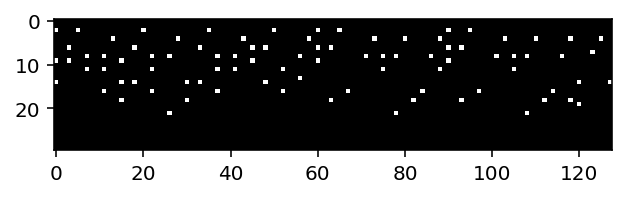

Reproduction
Original Images


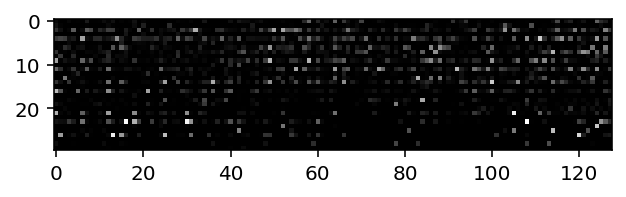

File  vg_piano/BCCMatchPiano.mid
Original
Original Images


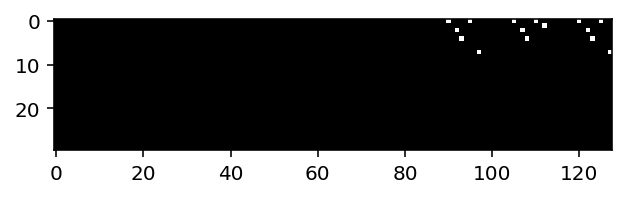

Reproduction
Original Images


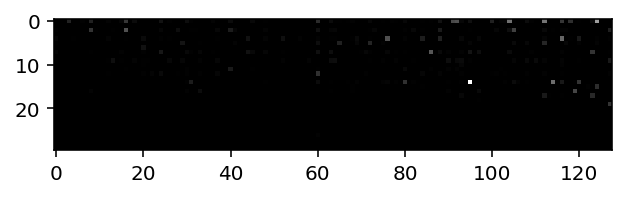

File  vg_piano/MajMas-ALIENSOLO.mid
Original
Original Images


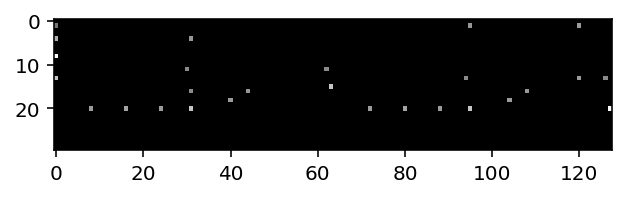

Reproduction
Original Images


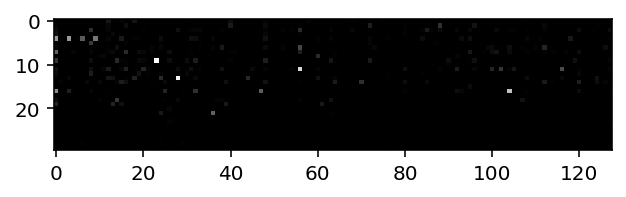

File  vg_piano/verdanturf.mid
Original
Original Images


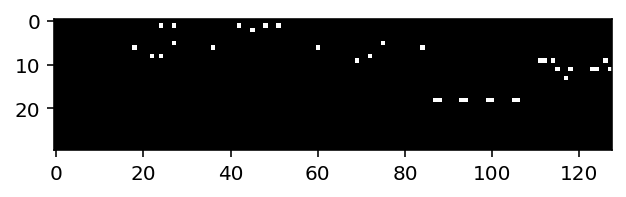

Reproduction
Original Images


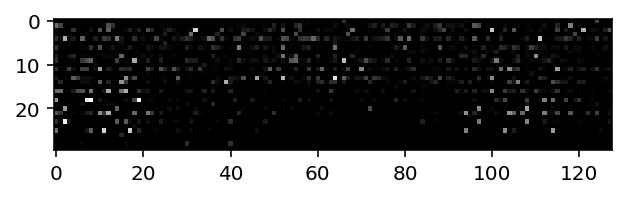

File  vg_piano/dkcddtBADparade.mid
Original
Original Images


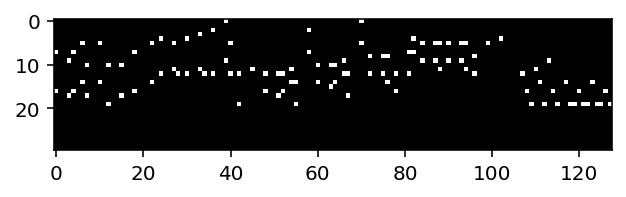

Reproduction
Original Images


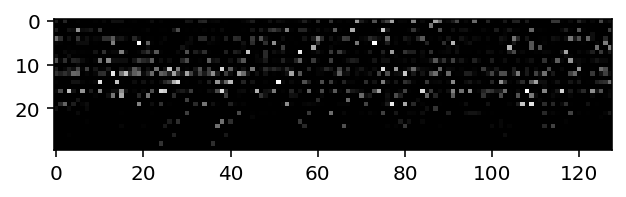

File  vg_piano/MNG-tosasolo.mid
Original
Original Images


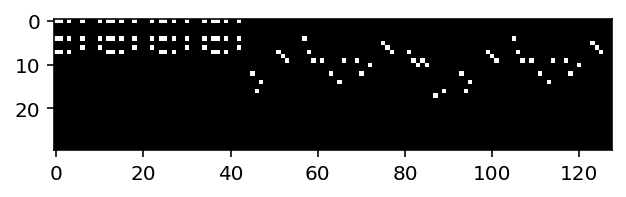

Reproduction
Original Images


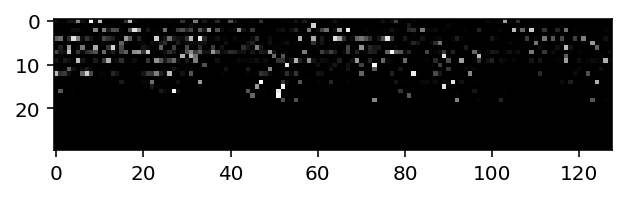

File  vg_piano/SMW_Ending.mid
Original
Original Images


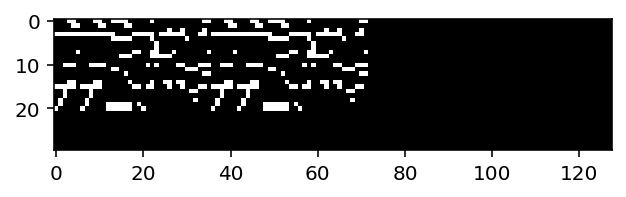

Reproduction
Original Images


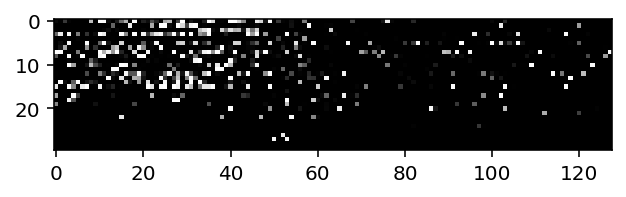

File  vg_piano/Aion_Tower_Of_Eternity.mid
Original
Original Images


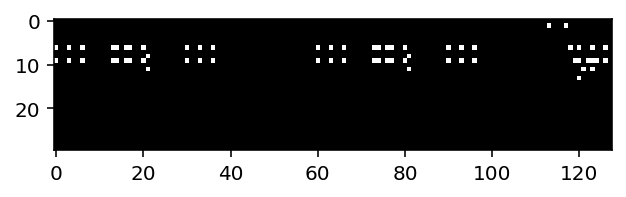

Reproduction
Original Images


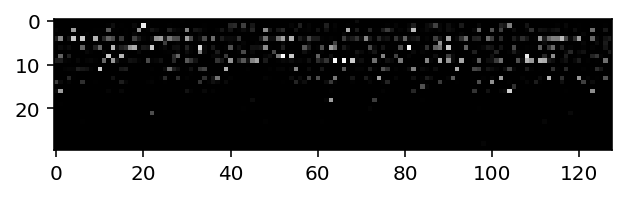

File  vg_piano/festivalsolo.mid
Original
Original Images


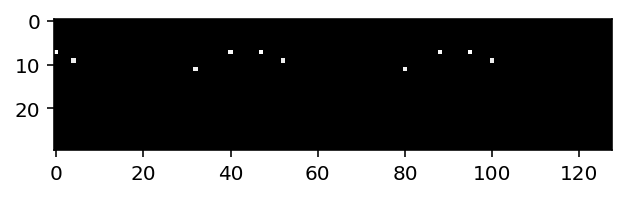

Reproduction
Original Images


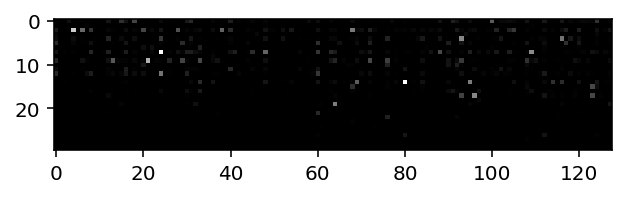

File  vg_piano/dk_title.mid
Original
Original Images


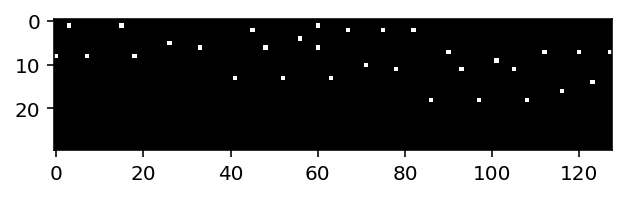

Reproduction
Original Images


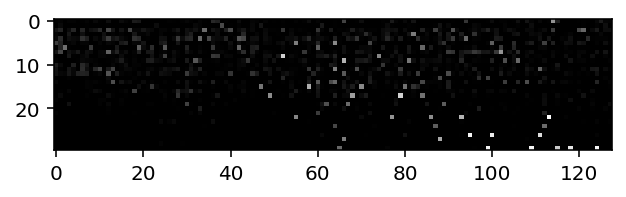

File  vg_piano/Etude_for_Ghosts.mid
Original
Original Images


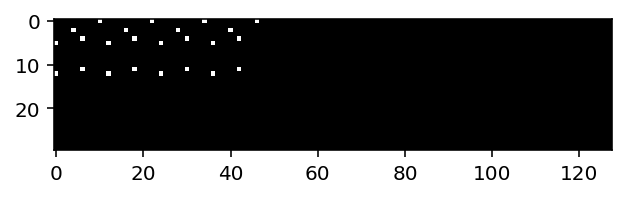

Reproduction
Original Images


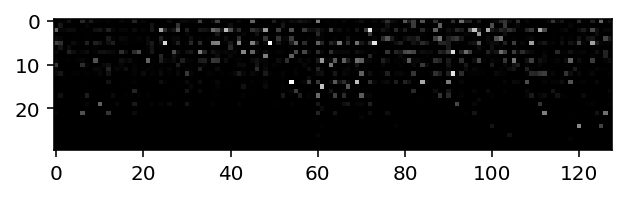

File  vg_piano/emerald.mid
Original
Original Images


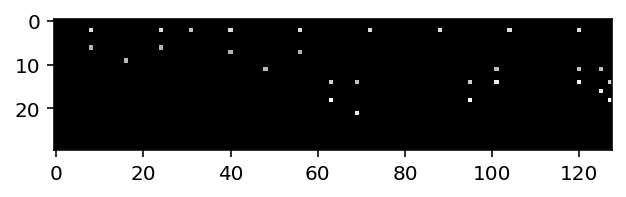

Reproduction
Original Images


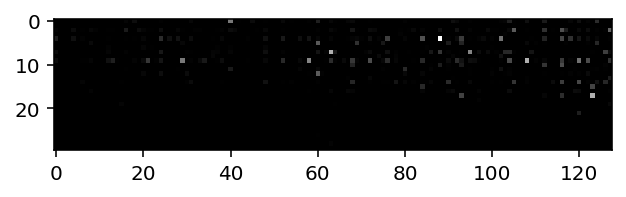

File  vg_piano/Ff7-One_Winged.mid
Original
Original Images


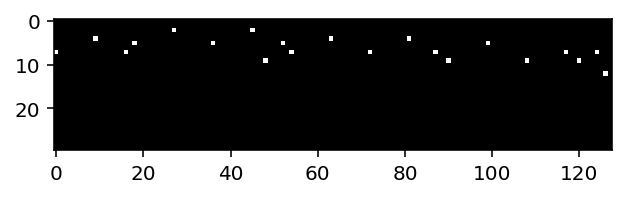

Reproduction
Original Images


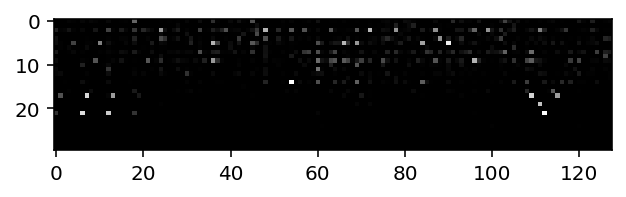

File  vg_piano/venuslighthouse.mid
Original
Original Images


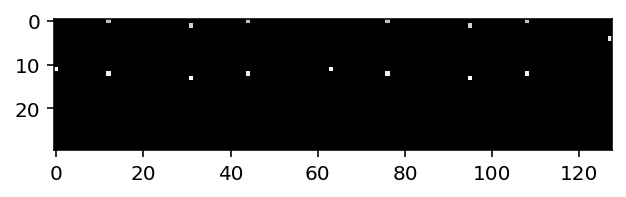

Reproduction
Original Images


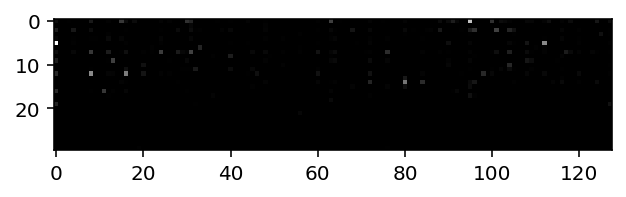

File  vg_piano/norKEM.mid
Original
Original Images


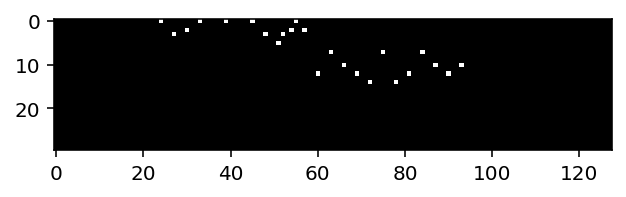

Reproduction
Original Images


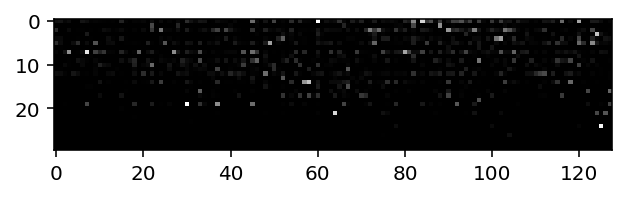

File  vg_piano/Legend_of_Mana_Southern_City_Polporta.mid
Original
Original Images


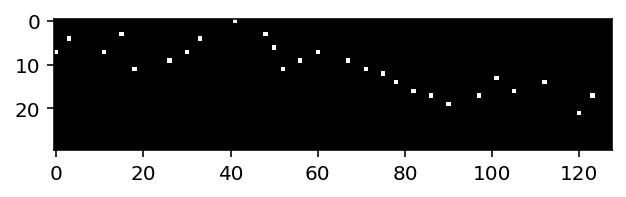

Reproduction
Original Images


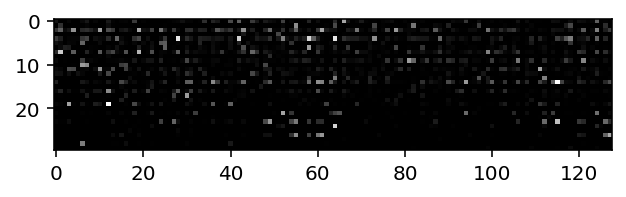

File  vg_piano/TwinleafTownDay.mid
Original
Original Images


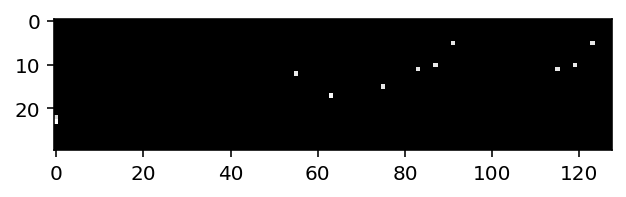

Reproduction
Original Images


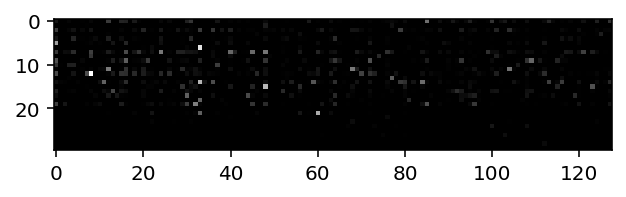

File  vg_piano/YMED.mid
Original
Original Images


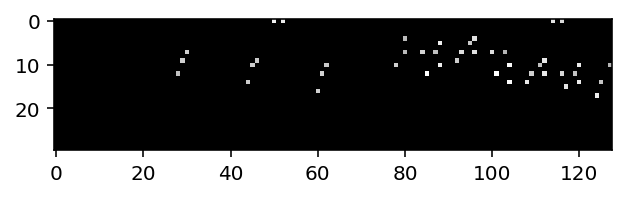

Reproduction
Original Images


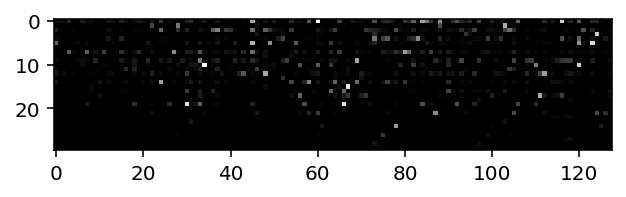

File  vg_piano/Route_38.mid
Original
Original Images


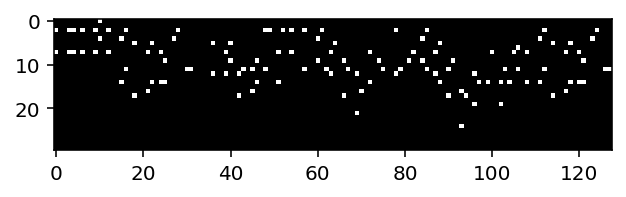

Reproduction
Original Images


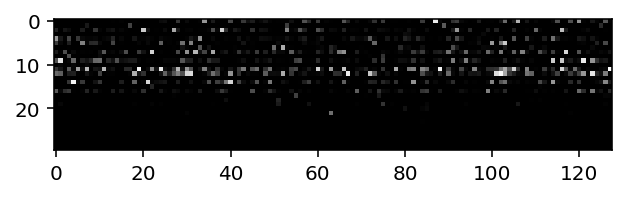

File  vg_piano/wish.mid
Original
Original Images


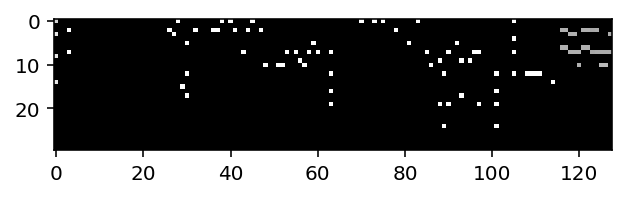

Reproduction
Original Images


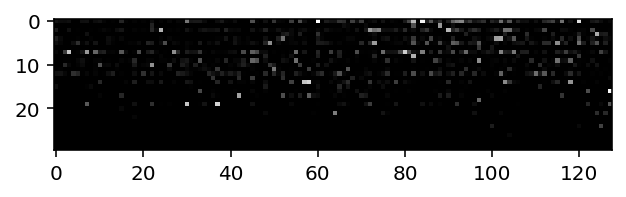

File  vg_piano/AsaZanarkand.mid
Original
Original Images


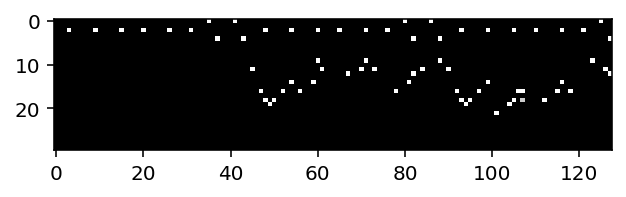

Reproduction
Original Images


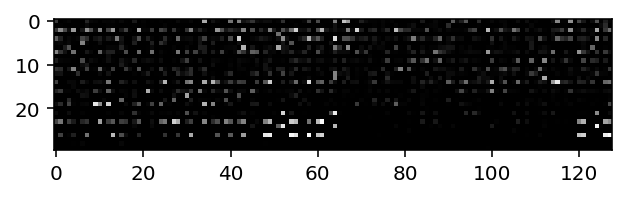

File  vg_piano/06crashman.mid
Original
Original Images


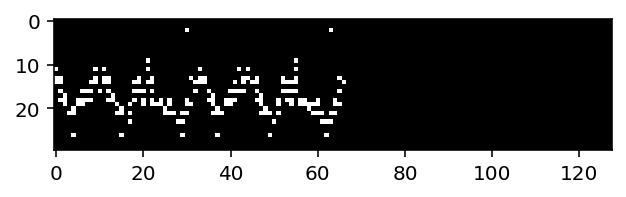

Reproduction
Original Images


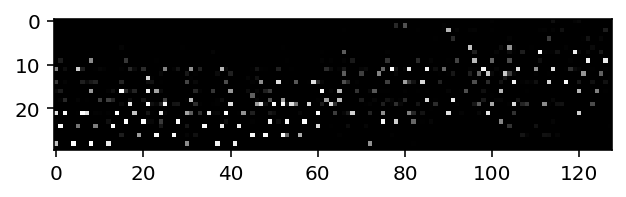

In [18]:
# on new data using `predict`
predictions = vae.predict(x_test)
for i in range(len(predictions)):
    canvas_recon = np.empty((HEIGHT, WIDTH))
    
    print("File ", result[i].as_posix())
    
    print("Original")
    generateTrackImage(x_test[i])
    
    pattern = generateTrack(x_test[i])
    filename = "x_test_" + str(i) + ".mid"
    midi.write_midifile(filename, pattern)
    s = converter.parse(filename)
    s.show('midi')
    
    print("Reproduction")
    generateTrackImage(predictions[i])
    
    pattern = generateTrack(predictions[i])
    filename = "prediction_" + str(i) + ".mid"
    midi.write_midifile(filename, pattern)
    s = converter.parse(filename)
    s.show('midi')

## Generate new data